**Eric Meinhardt / emeinhardt@ucsd.edu**

In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#glypy-basics" data-toc-modified-id="glypy-basics-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><code>glypy</code> basics</a></span><ul class="toc-item"><li><span><a href="#Create-a-specific-glycan,-show-it-as-a-tree-and-in-linear-code" data-toc-modified-id="Create-a-specific-glycan,-show-it-as-a-tree-and-in-linear-code-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Create a specific glycan, show it as a tree and in linear code</a></span></li><li><span><a href="#List-of-linear-code-expressions" data-toc-modified-id="List-of-linear-code-expressions-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>List of linear code expressions</a></span></li><li><span><a href="#Declare-some-syntactic-categories" data-toc-modified-id="Declare-some-syntactic-categories-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Declare some syntactic categories</a></span></li></ul></li><li><span><a href="#Bottom-up-parsing" data-toc-modified-id="Bottom-up-parsing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Bottom-up parsing</a></span><ul class="toc-item"><li><span><a href="#Parenthesis-checking" data-toc-modified-id="Parenthesis-checking-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parenthesis checking</a></span></li><li><span><a href="#String-manipulation-boilerplate" data-toc-modified-id="String-manipulation-boilerplate-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>String manipulation boilerplate</a></span><ul class="toc-item"><li><span><a href="#Generating-contiguous-subsequences" data-toc-modified-id="Generating-contiguous-subsequences-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Generating contiguous subsequences</a></span></li><li><span><a href="#Generating-prefixes-and-suffixes" data-toc-modified-id="Generating-prefixes-and-suffixes-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Generating prefixes and suffixes</a></span></li><li><span><a href="#Deprefixing-and-desuffixing" data-toc-modified-id="Deprefixing-and-desuffixing-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Deprefixing and desuffixing</a></span></li><li><span><a href="#Circumfixing" data-toc-modified-id="Circumfixing-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Circumfixing</a></span></li><li><span><a href="#Decircumfixing" data-toc-modified-id="Decircumfixing-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>Decircumfixing</a></span></li><li><span><a href="#Infixing" data-toc-modified-id="Infixing-4.2.6"><span class="toc-item-num">4.2.6&nbsp;&nbsp;</span>Infixing</a></span></li><li><span><a href="#Deinfixing" data-toc-modified-id="Deinfixing-4.2.7"><span class="toc-item-num">4.2.7&nbsp;&nbsp;</span>Deinfixing</a></span></li></ul></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Krambeck-et-al.-2009's-ligand-&quot;...&quot;" data-toc-modified-id="Krambeck-et-al.-2009's-ligand-&quot;...&quot;-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>ligand</code> "..."</a></span></li><li><span><a href="#Krambeck-et-al.-2009's-continuation-&quot;_&quot;" data-toc-modified-id="Krambeck-et-al.-2009's-continuation-&quot;_&quot;-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Krambeck et al. 2009's <code>continuation</code> "_"</a></span></li><li><span><a href="#Identifying-what-continuation-wildcards-can-capture-that-ligand-wildcards-can't" data-toc-modified-id="Identifying-what-continuation-wildcards-can-capture-that-ligand-wildcards-can't-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Identifying what continuation wildcards can capture that ligand wildcards can't</a></span><ul class="toc-item"><li><span><a href="#Continuation-matches-are-a-superset-of-ligand-matches" data-toc-modified-id="Continuation-matches-are-a-superset-of-ligand-matches-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>Continuation matches are a superset of ligand matches</a></span></li><li><span><a href="#What's-unique-to-continuation-matches?" data-toc-modified-id="What's-unique-to-continuation-matches?-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>What's unique to continuation matches?</a></span></li></ul></li></ul></li></ul></div>

# Motivation

**Purpose:** This is software-as-'tool for thinking' aimed at illuminating the meaning of inscrutable linear code wildcard operators.

**Plan:** `glypy` does not support linear code wildcard operators, but it lets you move between different representations of *individual glycan (types)*. The point of this notebook is to augment this functionality by one or both
 1. taking a linear code expression that contains wildcard operators and *generating examples* of glycans in the set described by that expression.
 2. taking a set of glycans and a linear code expression and indicating whether that set of glycans is contained within the set of glycans described by the expression.
 
The code in this notebook will then support experimentally determining what the (un)intuitive meaning of wildcard operators is.

# Imports

In [2]:
from funcy import *

In [3]:
from itertools import product

In [4]:
from copy import deepcopy

In [5]:
import glypy

In [6]:
from glypy.plot import plot
%matplotlib inline

In [7]:
import glypy.io.linear_code

# `glypy` basics

## Create a specific glycan, show it as a tree and in linear code

In [8]:
#much of the code snippets in this subsection are taken from the glypy docs

In [9]:
monosaccharides = glypy.monosaccharides

In [10]:
glcnac1 = monosaccharides["GlcNAc"]
glcnac2 = monosaccharides["GlcNAc"]

glcnac1.add_monosaccharide(glcnac2, position=4)
bdman = monosaccharides["bdMan"]
glcnac2.add_monosaccharide(bdman, position=4)
adman1 = monosaccharides["adMan"]
bdman.add_monosaccharide(adman1, position=3)
adman2 = monosaccharides["adMan"]
bdman.add_monosaccharide(adman2, position=6)

n_linked_core = glypy.Glycan(root=glcnac1)
print(n_linked_core)

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

RES 1b:b-dman-HEX-1:5

RES 1b:b-dman-HEX-1:5

RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dman-HEX-1:5
6b:a-dman-HEX-1:5
7b:a-dman-HEX-1:5
LIN
1:1d(2+1)2n
2:1o(4+-1)3d
3:3d(2+1)4n
4:3o(4+-1)5d
5:5o(3+-1)6d
6:5o(6+-1)7d



(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff812fe4b10>)

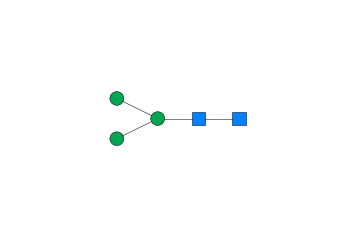

In [11]:
plot(n_linked_core)

In [12]:
glypy.io.linear_code.to_linear_code(n_linked_core)

'Ma6(Ma3)Mb4GNb4GNb'

(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=1  x=3.061616997868383e-17 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff812ed3050>)

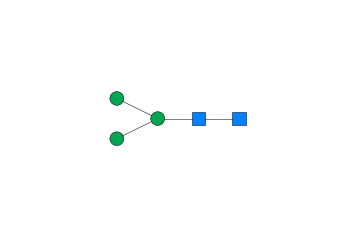

In [13]:
plot(glypy.io.linear_code.parse_linear_code('Ma6(Ma3)Mb4GNb4GNb'))

In [14]:
def gen(glycan):
    '''
    Abbreviation for 
      `glypy.io.linear_code.to_linear_code(glycan)`
    '''
    return glypy.io.linear_code.to_linear_code(glycan)

def parse(linear_code_expression):
    '''
    Abbreviation for 
      `glypy.io.linear_code.parse_linear_code(linear_code_expression)`
    '''
    return glypy.io.linear_code.parse_linear_code(linear_code_expression)

def parsePlot(linear_code_expression):
    '''
    Abbreviation for 
      `plot(glypy.io.linear_code.parse_linear_code(linear_code_expression))`
    '''
    plot(glypy.io.linear_code.parse_linear_code(linear_code_expression))

'GN?'

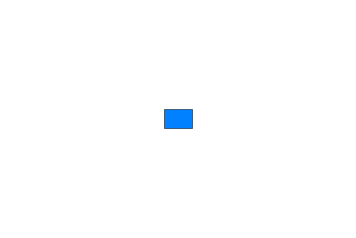

In [15]:
parsePlot('GN')
GN_parsed = parse('GN');
gen(GN_parsed)

In [16]:
GN_parsed

RES 1b:x-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n

'GNb'

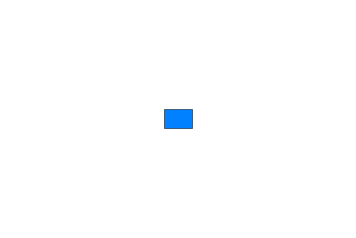

In [17]:
gen(monosaccharides["GlcNAc"])
parsePlot('GNb')

## List of linear code expressions

In [18]:
#Banin et al., 2002, Fig. 1
Bea2002Fig1 = ['GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa']

Bea2002B21 = ['Fa4GNb3Ab4Gb']
Bea2002B22 = ['GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb',
              'Ab3ANb4(NNa3)Ab4Gb',
              'Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb']
Bea2002B23 = ['{nGa6Ga4(-Ab3-)Ub2Ha3Ha3Ha3}'] #glypy chokes on this
Bea2002B24 = ['GNb3Ab#4-Trifluoroacetamidophenol'] #glypy chokes on this
Bea2002s = [Bea2002Fig1, Bea2002B21, Bea2002B22]#, Bea2002B23, Bea2002B24]
Banins = cat(Bea2002s)

GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa
------
====
Fa4GNb3Ab4Gb
------
====
GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb
------
Ab3ANb4(NNa3)Ab4Gb
------
Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb
------
====


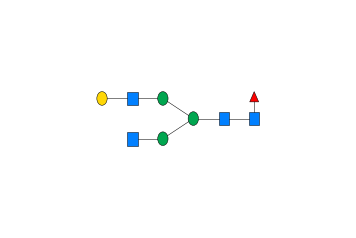

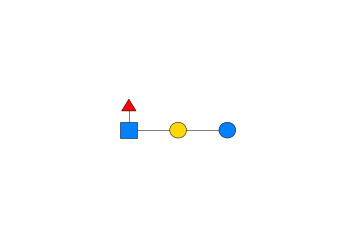

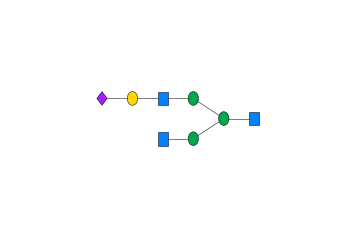

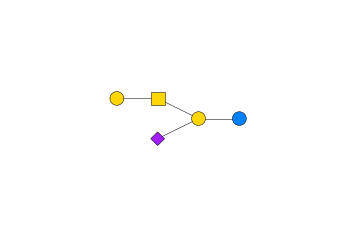

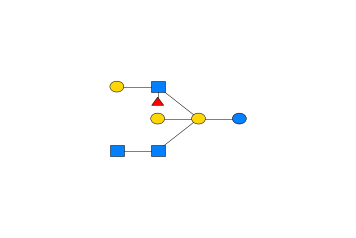

In [19]:
for eachBea in Bea2002s:
    for lce in eachBea:
        print(lce)
        parsePlot(lce)
        print('------')
    print('====')

In [20]:
#Krambeck et al. 2009, Fig. 1
Kea2009Fig1 = [
    'Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
    'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
    'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN']
Kea2009Fig1

#Krambeck et al. 2009, Fig. 5
Kea2009Fig5 = [
    'GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
    'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN']
Kea2009Fig5

['Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN']

['GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
 'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN']

In [21]:
LCEs = deepcopy(Kea2009Fig1) + deepcopy(Kea2009Fig5) + deepcopy(Banins)

Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------
Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------
Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
------


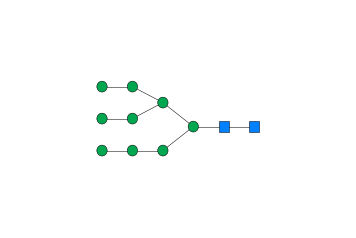

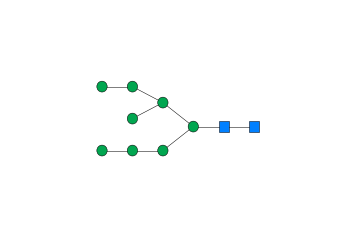

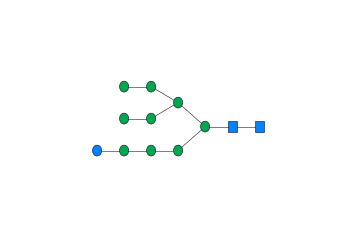

In [22]:
for lce in Kea2009Fig1:
    print(lce)
    parsePlot(lce)
    print('------')


GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
------
NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN
------


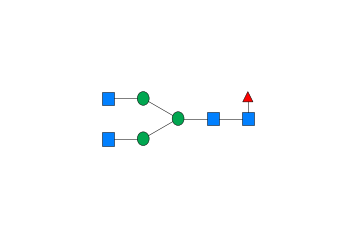

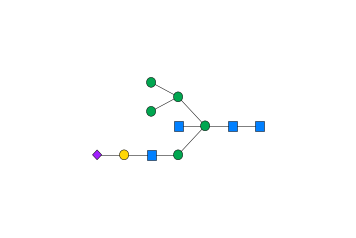

In [23]:
for lce in Kea2009Fig5:
    print(lce)
    parsePlot(lce)
    print('------')

In [24]:
# #Krambeck et al. 2017, Table 7, `'substrate' column
# ['(Ma2Ma',
# '(Ma3(Ma2Ma3(Ma6)Ma6)',
# '(Ma3(Ma6)Ma6',
# ]

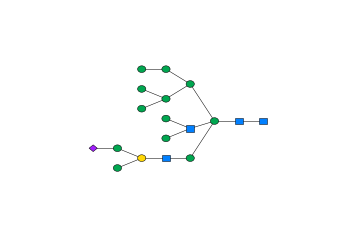

In [108]:
testTree = 'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'
parsePlot(testTree)

## Declare some syntactic categories

In [25]:
print(list(monosaccharides))
len(list(monosaccharides))

['Hep', 'Ribose', 'NeuGc', 'Hex', 'bdGal', 'GlcN', 'Fru', '2-Amino-2-deoxyglucose', u'2-Keto-3-deoxynanonic acid', 'NeuAc2', 'Oct', 'Glucose', 'Psicose', 'Non', 'Psi', 'Allose', 'Neu5Ac', 'GlcNAc', 'MurNAc', 'Gal', 'Neu5Gc', 'Quinovose', 'ManAnhydro', 'Fucose', 'Tri', u'Neuraminic acid', 'Fructose', 'Ery', 'Gul', 'Rha', 'GalNac', 'Bac', 'Glucosamine', u'Muramic Acid', 'Dec', 'Tyv', 'Tyvelose', 'Kdn', 'Kdo', 'Oli', 'Sorbose', 'bdMan', 'Lyx', 'Rhamnose', 'Ara', 'Tag', 'Fructofuranose', u'Glucuronic Acid', 'Tal', 'Rib', 'Threose', 'Sug', 'Erythrose', 'GlcNA', 'Mur', 'Tet', 'Pen', 'Talose', 'Neu', 'Altose', 'Olivose', u'Neu5,9Ac2', 'MurNGc', 'Fuc', 'Thr', 'bdGlc', 'Xylose', 'GlcA', u'Sialic Acid', 'Sed', 'GalNAc', 'Qui', 'Arabinose', 'IdoA', 'NeuAc', 'Man', 'Galactose', u'Galacturonic Acid', 'Glc', 'GlcNac', 'KDN', 'N-Acetylglucosamine', 'adMan', 'Xulose', 'Mannose', 'GalA', 'Xul', 'Tagatose', 'Lyxose', 'HexNAc', 'All', 'Ido', u'Iduronic Acid', 'aMan', 'Bacillosamine', 'Sedulose', 'Sor', '

100

In [26]:
MS_codes = set()
has_no_code = set()
for each in list(monosaccharides):
    print('-----')
    try:
        print(gen(monosaccharides.get(each)))
        print('*')
        result = gen(monosaccharides.get(each))
        MS_codes.add(result)
        if result[-1] == '?':
            MS_codes.add(result[:-1])
    except Exception as e:
        print(each)
        print(e)
        has_no_code.add(each)
        print('!')
    print('----')

-----
Ga
*
----
-----
B?
*
----
-----
NJa
*
----
-----
Hex
Linear Code does not support generic monosaccharide RES 1b:x-HEX-1:5
!
----
-----
Ab
*
----
-----
G[Q]b
*
----
-----
E?
*
----
-----
G[Q]b
*
----
-----
Ka
*
----
-----
NN[9N]a
*
----
-----
M?
*
----
-----
Gb
*
----
-----
E?
*
----
-----
Ga
*
----
-----
E?
*
----
-----
O?
*
----
-----
NNa
*
----
-----
GNb
*
----
-----
MurNAc
'(r)_lactate'
!
----
-----
Ab
*
----
-----
NJa
*
----
-----
G?
*
----
-----
ManAnhydro
'anhydro'
!
----
-----
Fa
*
----
-----
Tri
Linear Code does not support generic monosaccharide RES 1b:x-TRI-x:x
!
----
-----
N[5Q]?
*
----
-----
E?
*
----
-----
G?
*
----
-----
G?
*
----
-----
H?
*
----
-----
ANb
*
----
-----
H[2Q, 4Q]a
*
----
-----
G[Q]b
*
----
-----
Muramic Acid
'(r)_lactate'
!
----
-----
Dec
Linear Code does not support generic monosaccharide RES 1b:x-DEC-x:x
!
----
-----
G?
*
----
-----
G?
*
----
-----
Ka
*
----
-----
W?
*
----
-----
G?
*
----
-----
E?
*
----
-----
Mb
*
----
-----
X?
*
----
-----
H?
*


In [27]:
len(MS_codes)
print(MS_codes)
print(has_no_code)

39

set(['NJa', 'H[2Q, 4Q]a', 'NNa', 'O?', 'L?', 'Ma', 'M?', 'N[5Q]?', 'I?', 'Fa', 'G?', 'GNb', 'N[5Q]', 'E?', 'X?', 'Ub', 'Ka', 'B', 'E', 'G', 'Mb', 'I', 'H', 'R?', 'M', 'L', 'O', 'Ab', 'W', 'X', 'NN[9N]a', 'ANb', 'G[Q]b', 'H?', 'R', 'Gb', 'Ga', 'W?', 'B?'])
set(['Tri', 'Sug', 'MurNGc', 'Mur', 'Hex', 'MurNAc', 'Pen', 'ManAnhydro', u'Muramic Acid', 'Dec', 'Tet', 'HexNAc'])


In [28]:
print(list(filter(lambda c: '?' in c, MS_codes)))

['O?', 'L?', 'M?', 'N[5Q]?', 'I?', 'G?', 'E?', 'X?', 'R?', 'H?', 'W?', 'B?']


In [29]:
MS_codes.add('GN')
MS_codes.add('GNa')

In [30]:
MSs = MS_codes

In [31]:
bonds = set(map(str, range(1,10)))
# bonds =  set(map(partial(str_join, ''), 
#                  product("ab", 
#                          map(str, 
#                              range(1,10)))))
bonds

{'1', '2', '3', '4', '5', '6', '7', '8', '9'}

# Bottom-up parsing

The code here supports looking at a linear code expression and identifying substrings that match the substitution rules for some wildcard operator.

## Parenthesis checking

Code for parsing Dyck languages and variants related to wild-card operators.

In [32]:
def has_balanced_parens(s):
    '''
    Indicates whether the string in question has balanced parentheses.
    '''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
        if x == ')':
            if len(paren_stack) == 0:
                return False
#             top = paren_stack[-1]
            paren_stack.pop()
    return len(paren_stack) == 0

In [33]:
positive_test_cases_balanced = ['', '()', '(())', '()()', '()(())']
negative_test_cases_balanced = ['(', ')', '())', '(()', '(()(', '))']

In [34]:
for c in positive_test_cases_balanced:
    print("{0}, {1}".format(c, has_balanced_parens(c)))
print('---')
for c in negative_test_cases_balanced:
    print("{0}, {1}".format(c, has_balanced_parens(c)))

, True
(), True
(()), True
()(), True
()(()), True
---
(, False
), False
()), False
((), False
(()(, False
)), False


In [35]:
def every_left_paren_has_a_right_paren(s):
    '''
    Indicates whether every open parenthesis has a matching close parenthesis.
    '''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
        if x == ')':
#             if len(paren_stack) == 0:
#                 return False
#             top = paren_stack[-1]
            if len(paren_stack) > 0:
                paren_stack.pop()
    return len(paren_stack) == 0

In [36]:
positive_test_cases_for_every_left_a_right = deepcopy(positive_test_cases_balanced)
positive_test_cases_for_every_left_a_right.extend([')', '())', '))'])
positive_test_cases_for_every_left_a_right

negative_test_cases_for_every_left_a_right = ['(', '(()', '()(', '(()(',')(()']
negative_test_cases_for_every_left_a_right

['', '()', '(())', '()()', '()(())', ')', '())', '))']

['(', '(()', '()(', '(()(', ')(()']

In [37]:
for c in positive_test_cases_for_every_left_a_right:
    print("{0}, {1}".format(c, every_left_paren_has_a_right_paren(c)))
print('---')    
for c in negative_test_cases_for_every_left_a_right:
    print("{0}, {1}".format(c, every_left_paren_has_a_right_paren(c)))

, True
(), True
(()), True
()(), True
()(()), True
), True
()), True
)), True
---
(, False
((), False
()(, False
(()(, False
)((), False


## String manipulation boilerplate

### Generating contiguous subsequences

In [38]:
def generate_subsequences(s, as_generator=False, with_contexts=False):
    '''
    Given a sequence of length n, generates all O(n^2) contiguous subsequences 
    of s.
    
    If with_contexts is True, returns a sequence of 3-tuples:
        ...(left context, subsequence, right context)...
    '''
    c = with_contexts
    subseqs = (s[i:j] if not c else (s[:i], s[i:j], s[j:])
               for i in range(len(s)) 
               for j in range(i+1,len(s)+1))
    if as_generator:
        return subseqs
    else:
        return tuple(subseqs)

In [39]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each)))
    
generate_subsequences((1,2,3))

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each, with_contexts=True)))

: ()
a: ('a',)
ab: ('a', 'ab', 'b')
abc: ('a', 'ab', 'abc', 'b', 'bc', 'c')
abcd: ('a', 'ab', 'abc', 'abcd', 'b', 'bc', 'bcd', 'c', 'cd', 'd')


((1,), (1, 2), (1, 2, 3), (2,), (2, 3), (3,))

: ()
a: (('', 'a', ''),)
ab: (('', 'a', 'b'), ('', 'ab', ''), ('a', 'b', ''))
abc: (('', 'a', 'bc'), ('', 'ab', 'c'), ('', 'abc', ''), ('a', 'b', 'c'), ('a', 'bc', ''), ('ab', 'c', ''))
abcd: (('', 'a', 'bcd'), ('', 'ab', 'cd'), ('', 'abc', 'd'), ('', 'abcd', ''), ('a', 'b', 'cd'), ('a', 'bc', 'd'), ('a', 'bcd', ''), ('ab', 'c', 'd'), ('ab', 'cd', ''), ('abc', 'd', ''))


### Generating prefixes and suffixes

In [40]:
to_str = partial(str_join, '')
rev_to_str = compose(to_str, reversed, to_str)

def generate_prefixes(s, as_generator=False):
    l = len(s)
    prefs = (s[:i] for i in range(l+1))
    if as_generator:
        return prefs
    return list(prefs)

def generate_suffixes(s, as_generator=False):
    s_prime = to_str(reversed(s)) if type(s) == str else tuple(reversed(s))
    if as_generator:
        if type(s) == str:
            return (rev_to_str(each) 
                    for each in generate_prefixes(s_prime, as_generator))
        else:
            return (tuple(reversed(each)) 
                    for each in generate_prefixes(s_prime, as_generator))
    else:
        if type(s) == str:
            return list(map(rev_to_str, generate_prefixes(s_prime, as_generator)))
        else:
            return list(map(lambda s: tuple(reversed(s)),
                            generate_prefixes(s_prime, as_generator)))

In [41]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_prefixes(each)))
#     print("{0}: {1}".format(each, list(generate_prefixes(each, True))))
    
generate_prefixes((1,2,3))

print('-----')

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_suffixes(each)))
#     print("{0}: {1}".format(each, generate_suffixes(each, True)))
#     print("{0}: {1}".format(each, list(generate_suffixes(each, True))))
generate_suffixes((1,2,3))

: ['']
a: ['', 'a']
ab: ['', 'a', 'ab']
abc: ['', 'a', 'ab', 'abc']
abcd: ['', 'a', 'ab', 'abc', 'abcd']


[(), (1,), (1, 2), (1, 2, 3)]

-----
: ['']
a: ['', 'a']
ab: ['', 'b', 'ab']
abc: ['', 'c', 'bc', 'abc']
abcd: ['', 'd', 'cd', 'bcd', 'abcd']


[(), (3,), (2, 3), (1, 2, 3)]

### Deprefixing and desuffixing

In [42]:
def deprefix(prefix, s, prefix_not_found_behavior='identity'):
    '''
    Left-inverse of sequence concatenation: returns p\s, where p = prefix.
    
    Behavior when p is not a prefix of s is governed by 
    `prefix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    l_prefix = len(prefix)
    l_s = len(s)
    prefix_match = False
    quotient = ''
    
    if l_prefix <= l_s:
        prefix_match = s[:l_prefix] == prefix
    
    if prefix_match:
        quotient = s[l_prefix:]
        return quotient
    
    if prefix_not_found_behavior == 'identity':
        return s
    elif prefix_not_found_behavior == 'empty':
        return '' if type(s) == str else tuple()
    elif prefix_not_found_behavior == 'null':
        return None
    else:
        raise Exception("behavior must be 'identity', 'empty', or 'null': got {0}".format(prefix_not_found_behavior))

In [43]:
deprefix('foo', 'foobar')
deprefix('bar', 'foobar', 'identity')
deprefix('bar', 'foobar', 'empty')
deprefix('bar', 'foobar', 'null')

deprefix([1], [1,2,3])
deprefix([2], [1,2,3], 'identity')
deprefix([2], [1,2,3], 'empty')
deprefix([2], [1,2,3], 'null')

'bar'

'foobar'

''

[2, 3]

[1, 2, 3]

()

In [44]:
def desuffix(suffix, s, suffix_not_found_behavior='identity'):
    '''
    Right-inverse of sequence concatenation: returns s/f where f = suffix.
    
    Behavior when f is not a suffix of s is governed by 
    `suffix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    if type(s) == str:
        result = deprefix(rev_to_str(suffix), 
                          rev_to_str(s), 
                          suffix_not_found_behavior)
    if type(s) == str and result is not None:
        return rev_to_str(result)
    if type(s) != str:
        result = deprefix(tuple(reversed(suffix)), 
                          tuple(reversed(s)), 
                          suffix_not_found_behavior)
    if type(s) != str and result is not None:
        return tuple(reversed(result))
    return result

In [45]:
desuffix('bar', 'foobar')
desuffix('foo', 'foobar', 'identity')
desuffix('foo', 'foobar', 'empty')
desuffix('foo', 'foobar', 'null')

desuffix([3], [1,2,3])
desuffix([2], [1,2,3], 'identity')
desuffix([2], [1,2,3], 'empty')
desuffix([2], [1,2,3], 'null')

'foo'

'foobar'

''

(1, 2)

(1, 2, 3)

()

### Circumfixing

In [46]:
def circumfix(prefix, suffix, s):
    '''
    Returns 
        prefix + s + suffix
    '''
    return prefix + s + suffix

In [47]:
circumfix('FOO', 'BAR', 'baz')

'FOObazBAR'

### Decircumfixing

In [48]:
def decircumfix(prefix, suffix, s, circumfix_not_found_behavior='identity'):
    '''
    Inverse of circumfix(prefix, suffix, u): returns u = (prefix\s)/suffix.
    
    Behavior when s does not have (prefix, suffix) as a circumfix is governed by
    `circumfix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    has_circumfix = False
    
    deprefixed = deprefix(prefix, s, circumfix_not_found_behavior)
    
    if deprefixed is None:
        return None
    
    if circumfix_not_found_behavior == 'identity' and prefix != '':
        has_circumfix = deprefixed != s
    if not has_circumfix and circumfix_not_found_behavior == 'identity':
        return s
    
    decircumfixed = desuffix(suffix, deprefixed, circumfix_not_found_behavior)
    
    if circumfix_not_found_behavior == 'identity' and suffix != '':
        has_circumfix = decircumfixed != deprefixed
    if not has_circumfix and circumfix_not_found_behavior == 'identity':
        return s
    
    return decircumfixed

In [49]:
decircumfix('FOO', 'BAR', 'FOObazBAR')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'identity')
decircumfix('FOO', 'BAR', 'FOObaz', 'identity')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'empty')
decircumfix('FOO', 'BAR', 'FOObaz', 'empty')
print('---')
decircumfix('FOO', 'BAR', 'bazBAR', 'null')
decircumfix('FOO', 'BAR', 'FOObaz', 'null')

'baz'

---


'bazBAR'

'FOObaz'

---


''

''

---


In [50]:
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6,7,8,9))
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'identity')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'identity')
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'empty')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'empty')
print('---')
decircumfix((1,2,3), (7,8,9), (4,5,6,7,8,9), 'null')
decircumfix((1,2,3), (7,8,9), (1,2,3,4,5,6), 'null')

(4, 5, 6)

---


(4, 5, 6, 7, 8, 9)

(1, 2, 3, 4, 5, 6)

---


()

()

---


### Infixing

In [51]:
def infix(u, left_context, right_context):
    '''
    Returns 
        left_context + u + right_context
    '''
    return left_context + u + right_context

In [52]:
infix('baz', 'FOO', 'BAR')

'FOObazBAR'

### Deinfixing

In [53]:
def deinfix(u, s, infix_not_found_behavior='identity'):
    '''
    Multi-inverse of infix(u, left, right): returns all (left, right)s s.t.
        s = left + u + right
    
    Behavior when s does not have u as an infix is governed by
    `infix_not_found_behavior`:
      - 'identity' -> s
      - 'empty'    -> '' if s is a string else the empty tuple
      - 'null'     -> None
    '''
    all_subsequences_with_contexts = generate_subsequences(s, 
                                                           as_generator=False, 
                                                           with_contexts=True)
    relevant_subsequences = tuple(filter(lambda lcr: lcr[1] == u,
                                         all_subsequences_with_contexts))
    just_contexts = tuple(map(lambda lcr: (lcr[0], lcr[2]),
                              relevant_subsequences))
    if len(just_contexts) == 0:
        if infix_not_found_behavior == 'identity':
            return s
        elif infix_not_found_behavior == 'empty':
            return ''
        elif infix_not_found_behavior == 'null':
            return None
    
    return just_contexts

In [54]:
for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each)))
    
generate_subsequences((1,2,3))

for each in ['', 'a', 'ab', 'abc', 'abcd']:
    print("{0}: {1}".format(each, generate_subsequences(each, with_contexts=True)))

: ()
a: ('a',)
ab: ('a', 'ab', 'b')
abc: ('a', 'ab', 'abc', 'b', 'bc', 'c')
abcd: ('a', 'ab', 'abc', 'abcd', 'b', 'bc', 'bcd', 'c', 'cd', 'd')


((1,), (1, 2), (1, 2, 3), (2,), (2, 3), (3,))

: ()
a: (('', 'a', ''),)
ab: (('', 'a', 'b'), ('', 'ab', ''), ('a', 'b', ''))
abc: (('', 'a', 'bc'), ('', 'ab', 'c'), ('', 'abc', ''), ('a', 'b', 'c'), ('a', 'bc', ''), ('ab', 'c', ''))
abcd: (('', 'a', 'bcd'), ('', 'ab', 'cd'), ('', 'abc', 'd'), ('', 'abcd', ''), ('a', 'b', 'cd'), ('a', 'bc', 'd'), ('a', 'bcd', ''), ('ab', 'c', 'd'), ('ab', 'cd', ''), ('abc', 'd', ''))


In [55]:
deinfix('b', 'abcd')
deinfix('X', 'aaXbbXccX')
print('---')
deinfix('Y', 'abcd', 'identity')
deinfix('Y', 'aaXbbXccX', 'identity')
print('---')
deinfix('Y', 'abcd', 'empty')
deinfix('Y', 'aaXbbXccX', 'empty')
print('---')
deinfix('Y', 'abcd', 'null')
deinfix('Y', 'aaXbbXccX', 'null')

(('a', 'cd'),)

(('aa', 'bbXccX'), ('aaXbb', 'ccX'), ('aaXbbXcc', ''))

---


'abcd'

'aaXbbXccX'

---


''

''

---


## Tokenization

In [56]:
def tokenizer(linear_code_expression):
    '''
    Given a linear code expression for a single molecule s, splits ('tokenizes')
    s into 'tokens' ('words') with each token consisting of one of
        parentheses
        bond location
        monosaccharide (+ bond type? \FIXME WHY IS GLYPY LIKE THAT)
        
    (Note that it is NOT the job of a tokenizer to enforce or check either 
    syntactic or semantic restrictions.)
    '''
    #TODO alternative tokenization that might make more domain-specific sense
    # and/or have other desirable downstream consequences:
    # a token is one of:
    #  - parenthesis
    #  - a monosaccharide with bond information
    #  - a bare monosaccharide
    # where 'a monosaccharide with bond information' is either
    #  - a monosaccharide with just a bond type
    #  - a monosaccharide with a bond type and a bond location
    
    parens = ('(',')')
    
    categories = (parens, bonds, MSs)
    
    def right_greedy_tokenizer(lce, tokenized_result_so_far):
        '''
        Greedily (and recursively) tokenizes lce from the right.
        '''
        if lce == '':
            return tokenized_result_so_far
#         print('lce={0}'.format(lce))
        for suf in generate_suffixes(lce, True):
#             print('\tsuf={0}'.format(suf))
            for cat in categories:
#                 print('\t\tcat={0}'.format(cat))
                if suf in cat:
                    rest = desuffix(suf, lce)
#                     print('\t\trest={0}'.format(rest))
                    return right_greedy_tokenizer(rest, [suf] + 
                                                         tokenized_result_so_far)
        e = 'Tokenized portion: {0}\nUntokenized remainder: {1}'
        raise Exception(e.format(tokenized_result_so_far, lce))
    return right_greedy_tokenizer(linear_code_expression, [])

In [57]:
LCEs

['Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN',
 'GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN',
 'NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN',
 'GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa',
 'Fa4GNb3Ab4Gb',
 'GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb',
 'Ab3ANb4(NNa3)Ab4Gb',
 'Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb']

In [58]:
LCEs[0]
print(tokenizer(LCEs[0]))

'Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN'

['Ma', '2', 'Ma', '2', 'Ma', '3', '(', 'Ma', '2', 'Ma', '3', '(', 'Ma', '2', 'Ma', '6', ')', 'Ma', '6', ')', 'Mb', '4', 'GNb', '4', 'GN']


In [59]:
for lce in LCEs:
    print('Glycan:    {0}\nTokenized: {1}'.format(lce, str_join(' ', tokenizer(lce))))

Glycan:    Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ma 2 Ma 2 Ma 3 ( Ma 2 Ma 3 ( Ma 2 Ma 6 ) Ma 6 ) Mb 4 GNb 4 GN
Glycan:    Ma2Ma2Ma3(Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ma 2 Ma 2 Ma 3 ( Ma 3 ( Ma 2 Ma 6 ) Ma 6 ) Mb 4 GNb 4 GN
Glycan:    Ga3Ma2Ma2Ma3(Ma2Ma3(Ma2Ma6)Ma6)Mb4GNb4GN
Tokenized: Ga 3 Ma 2 Ma 2 Ma 3 ( Ma 2 Ma 3 ( Ma 2 Ma 6 ) Ma 6 ) Mb 4 GNb 4 GN
Glycan:    GNb2Ma3(GNb2Ma6)Mb4GNb4(Fa6)GN
Tokenized: GNb 2 Ma 3 ( GNb 2 Ma 6 ) Mb 4 GNb 4 ( Fa 6 ) GN
Glycan:    NNa6Ab4GNb2Ma3(GNb4)(Ma3(Ma6)Ma6)Mb4GNb4GN
Tokenized: NNa 6 Ab 4 GNb 2 Ma 3 ( GNb 4 ) ( Ma 3 ( Ma 6 ) Ma 6 ) Mb 4 GNb 4 GN
Glycan:    GNb2Ma3(Ab4GNb2Ma6)Mb4GNb4(Fa6)GNa
Tokenized: GNb 2 Ma 3 ( Ab 4 GNb 2 Ma 6 ) Mb 4 GNb 4 ( Fa 6 ) GNa
Glycan:    Fa4GNb3Ab4Gb
Tokenized: Fa 4 GNb 3 Ab 4 Gb
Glycan:    GNb2Ma3(NNa3Ab3GNb2Ma6)Mb4GNb
Tokenized: GNb 2 Ma 3 ( NNa 3 Ab 3 GNb 2 Ma 6 ) Mb 4 GNb
Glycan:    Ab3ANb4(NNa3)Ab4Gb
Tokenized: Ab 3 ANb 4 ( NNa 3 ) Ab 4 Gb
Glycan:    Ab4(GNb4GNb3)(Ab4(Fa3)GNb6)Ab4Gb
Tokenized: Ab 4 ( GN

## Krambeck et al. 2009's `ligand` "..."

`...` is supposed to match "Any string (possibly empty) with parentheses matched" (Table 7)

In [60]:
def is_ligand_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for) `...`.
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    return has_balanced_parens(s)

In [61]:
def get_ligand_matches(linear_code_expression, as_generator=False, with_contexts=False):
    '''
    Returns the substrings within `linear_code_expression` that match Krambeck
    et al's `ligand` wildcard `...`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_ligand_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_ligand_match, subsequences))

Let's investigate an example tree that has some subtrees (with their own subtrees...):

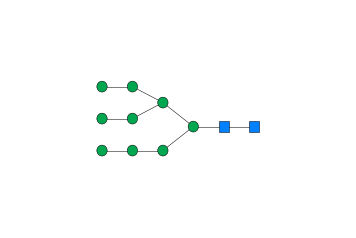

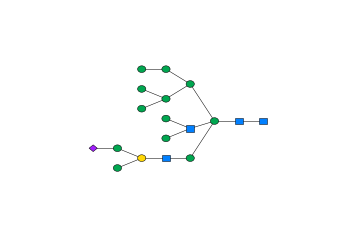

In [110]:
my_tree = LCEs[0]
parsePlot(my_tree)

my_tree = testTree
parsePlot(my_tree)

In [111]:
my_ligand_matches, my_nonmatches = split(is_ligand_match, 
                                         generate_subsequences(tokenizer(my_tree)))

len(my_ligand_matches), len(my_nonmatches)

(241, 887)

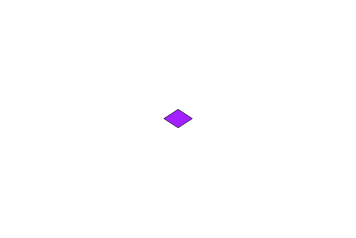

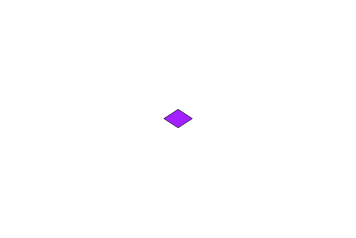

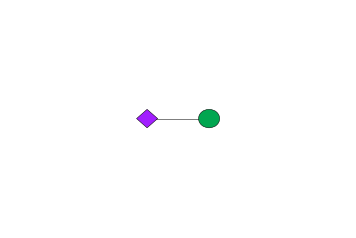

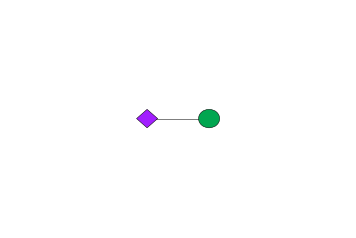

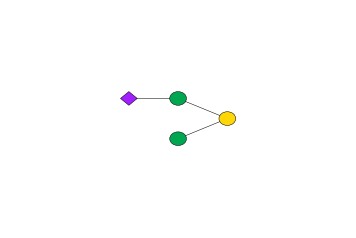

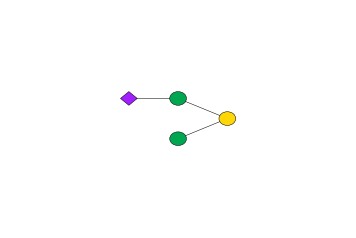

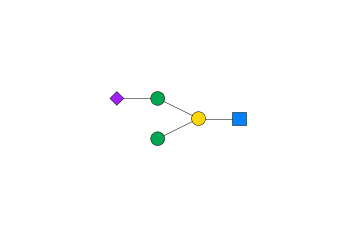

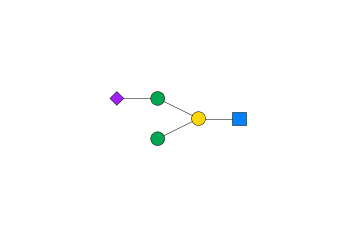

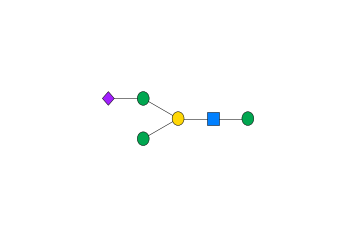

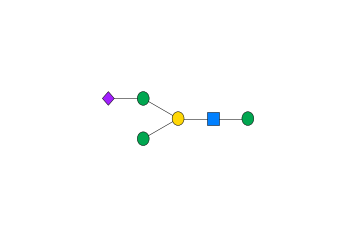

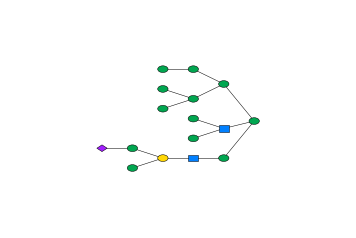

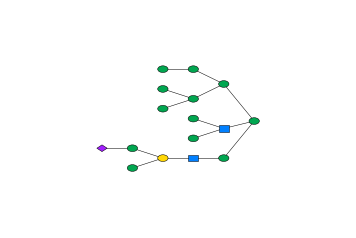

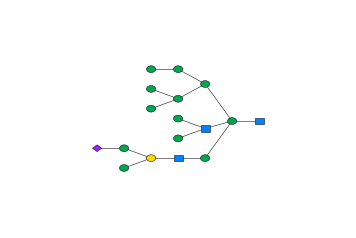

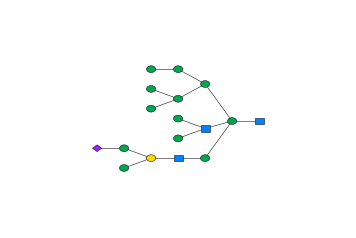

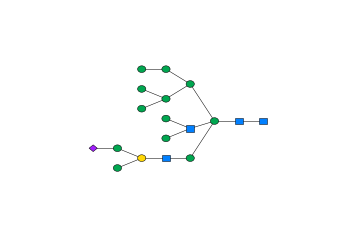

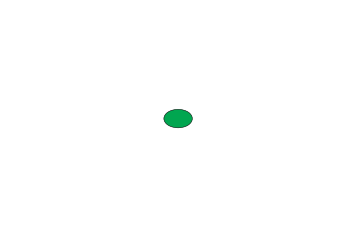

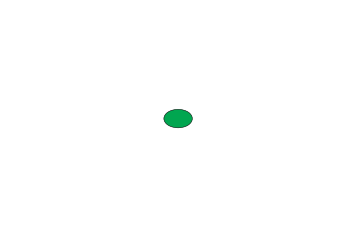

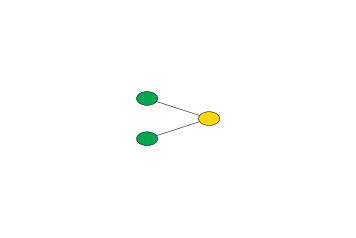

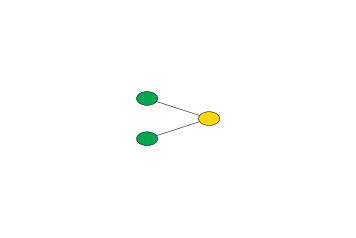

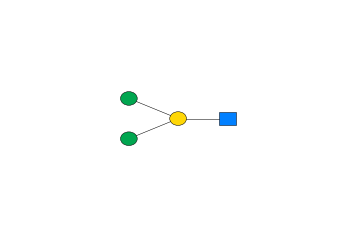

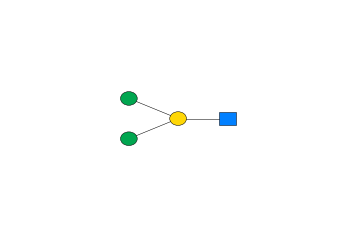

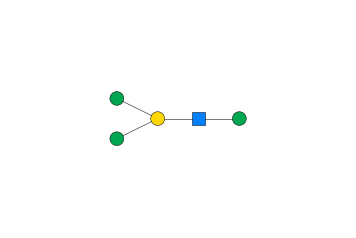

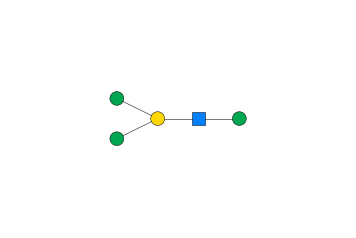

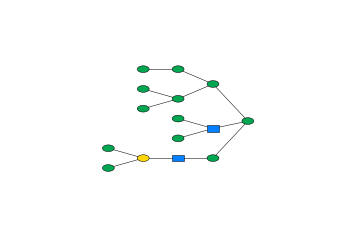

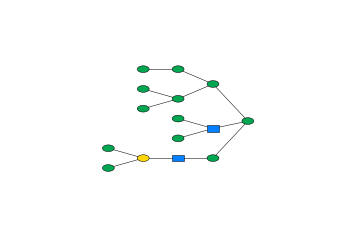

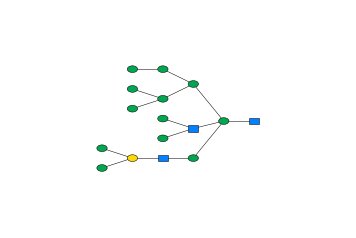

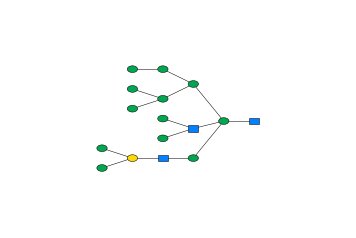

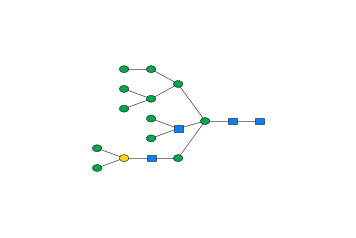

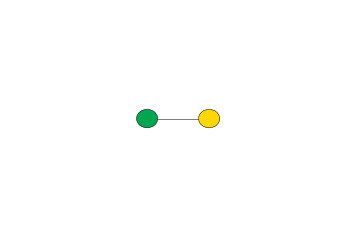

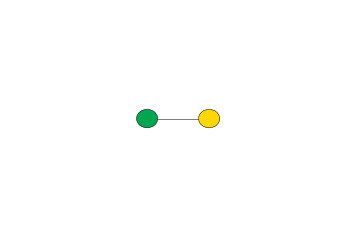

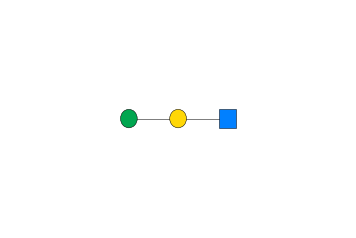

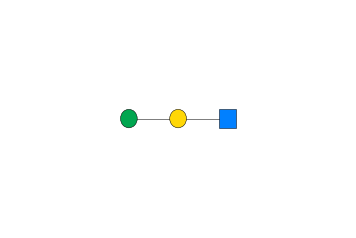

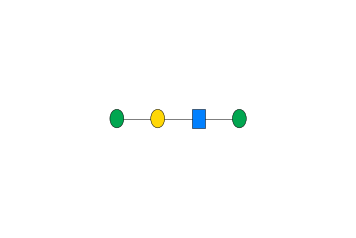

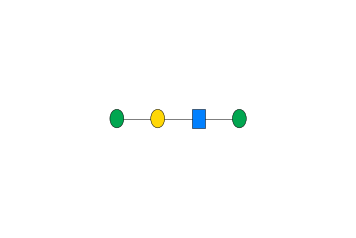

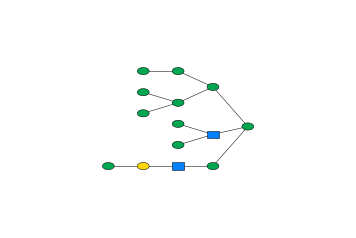

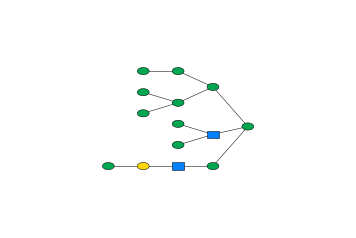

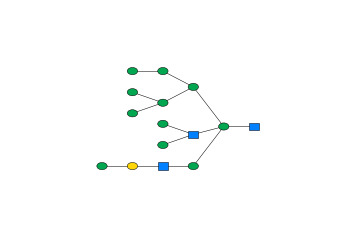

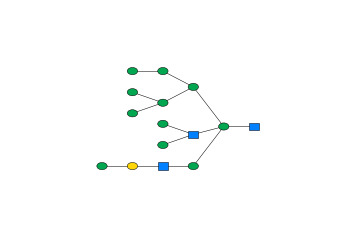

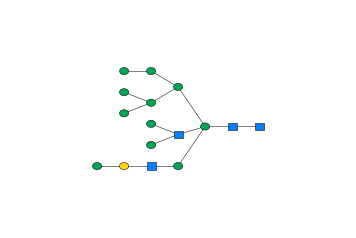

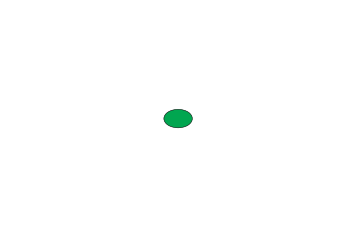

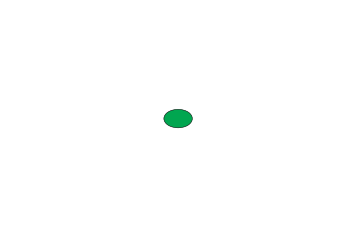

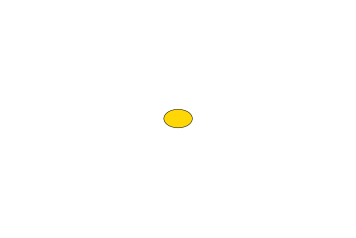

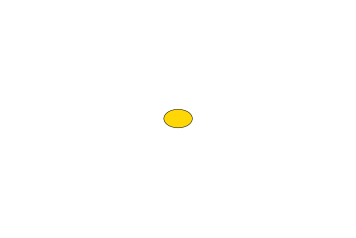

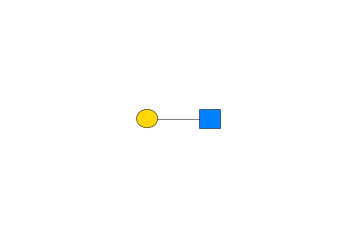

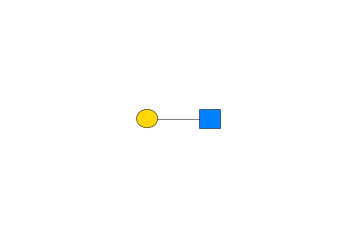

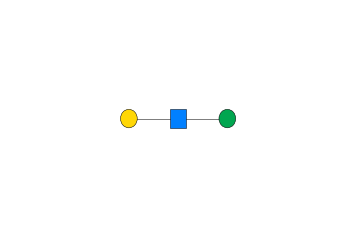

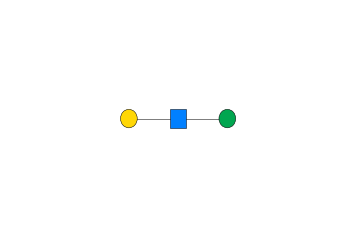

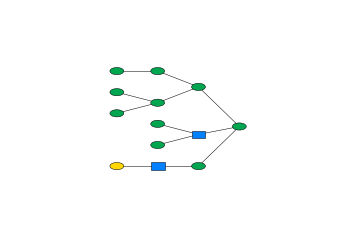

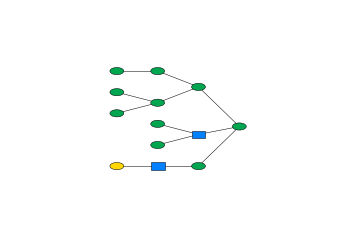

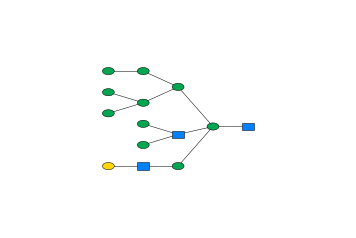

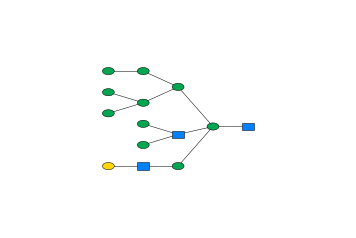

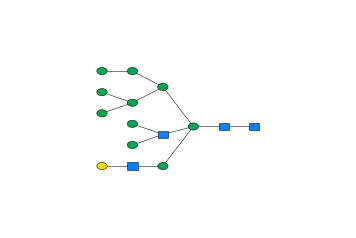

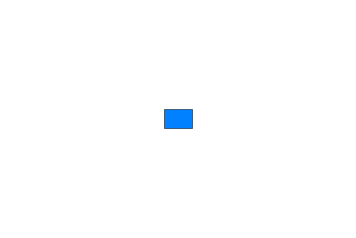

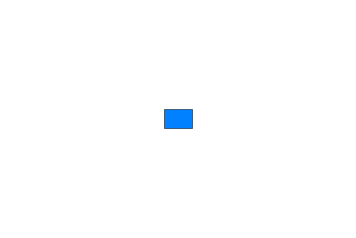

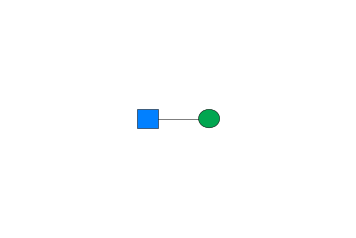

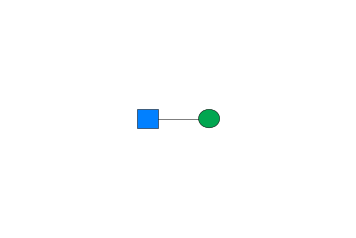

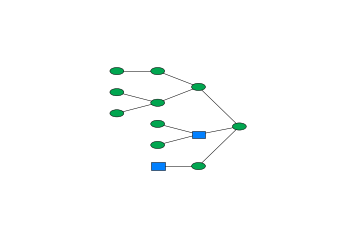

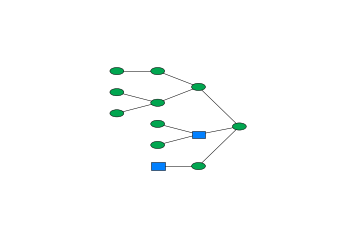

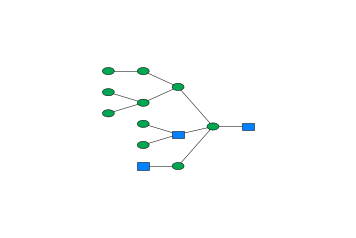

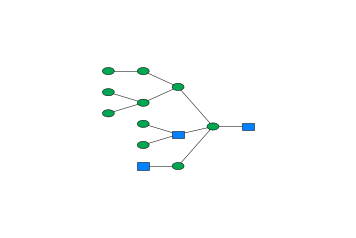

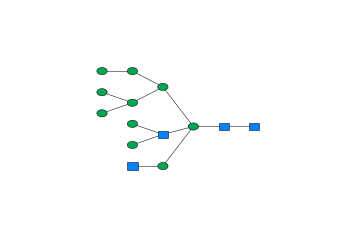

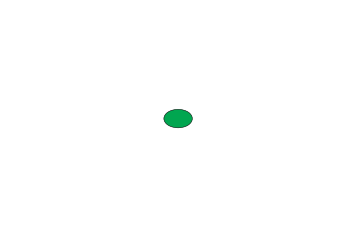

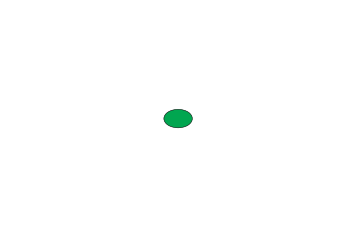

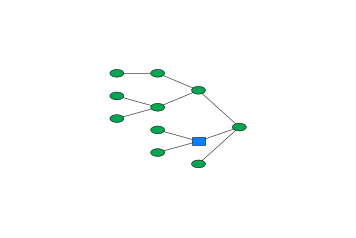

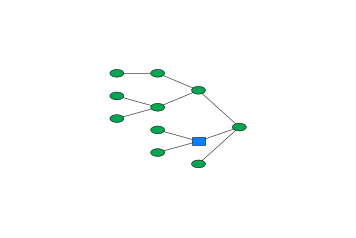

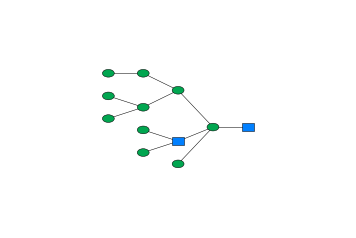

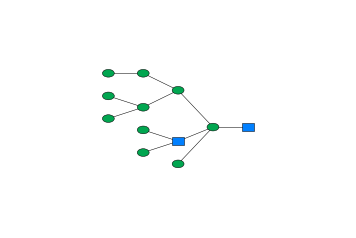

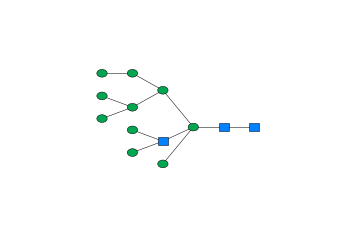

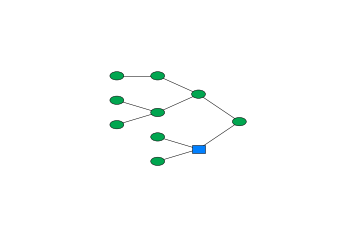

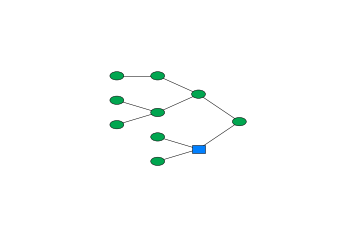

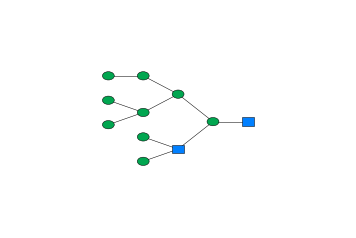

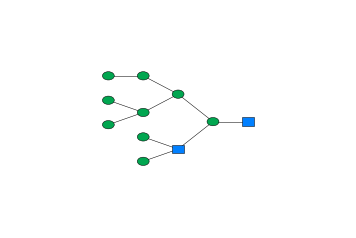

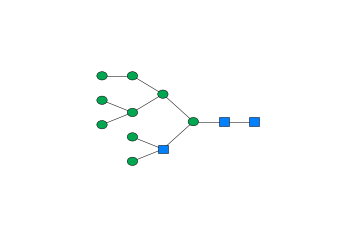

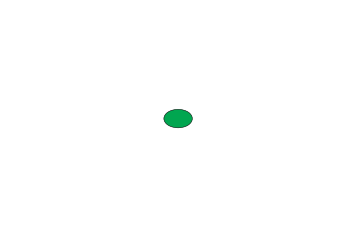

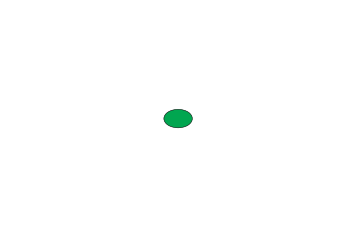

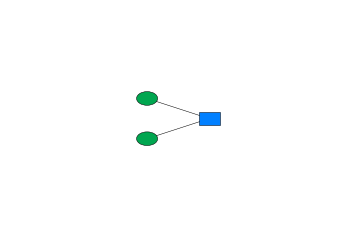

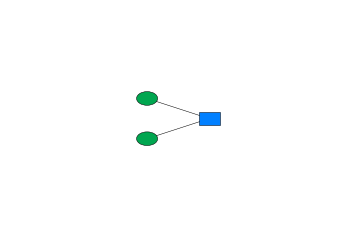

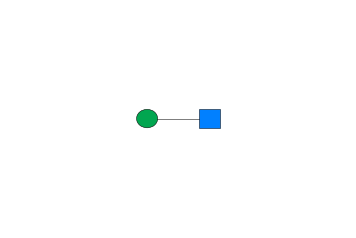

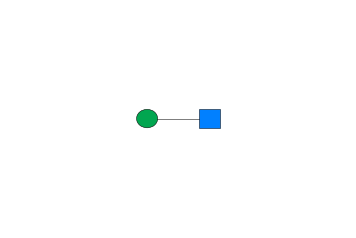

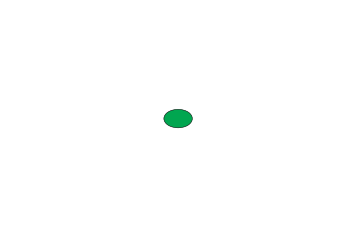

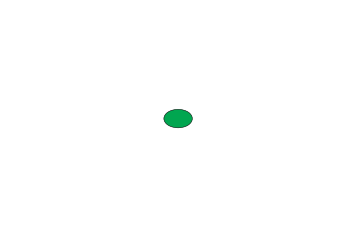

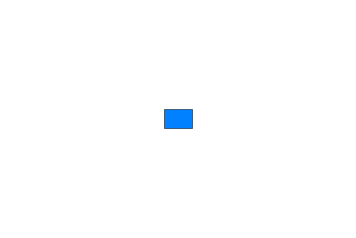

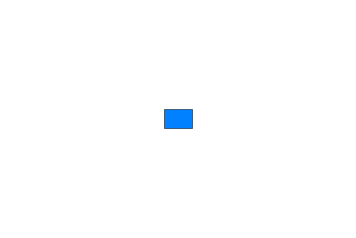

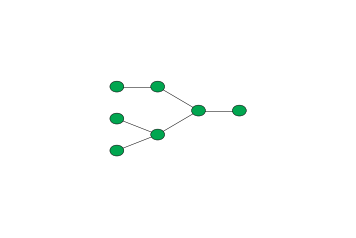

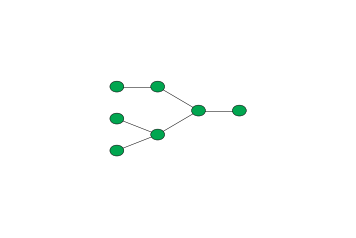

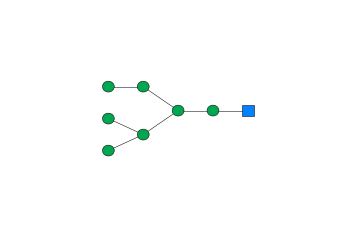

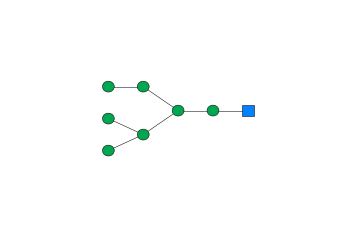

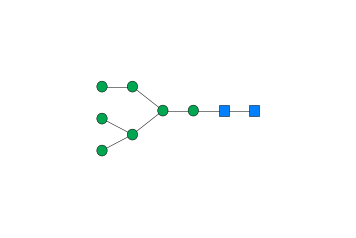

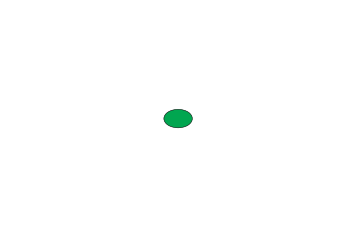

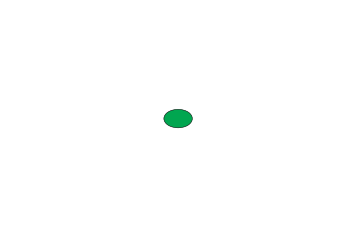

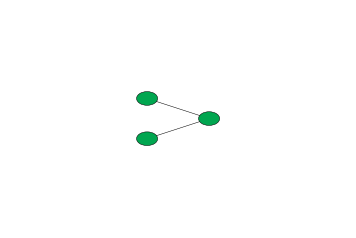

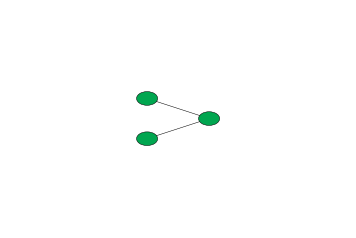

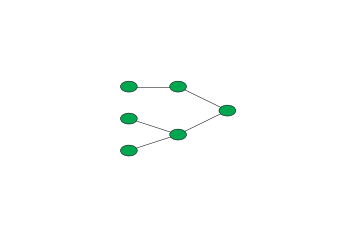

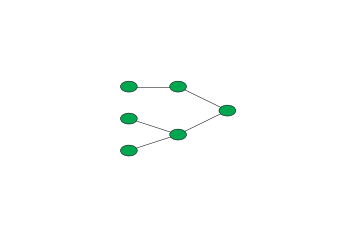

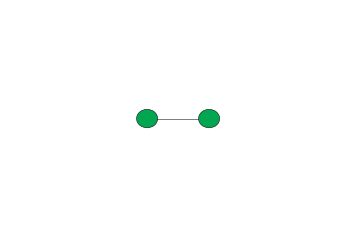

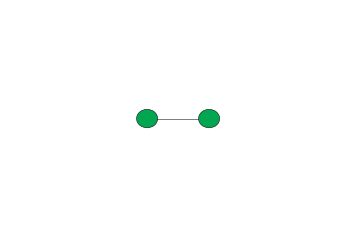

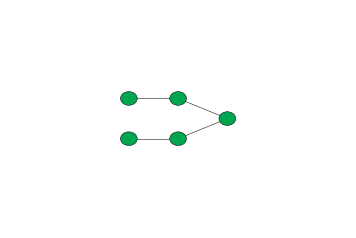

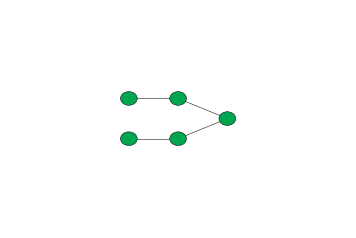

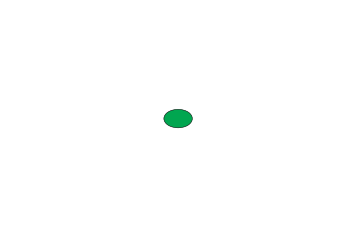

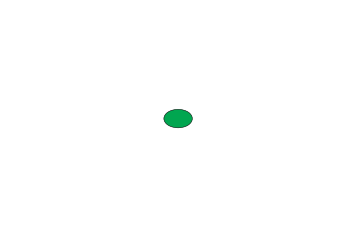

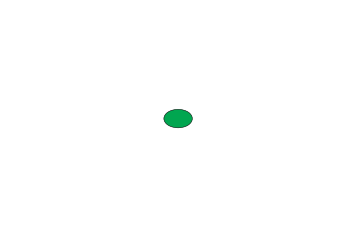

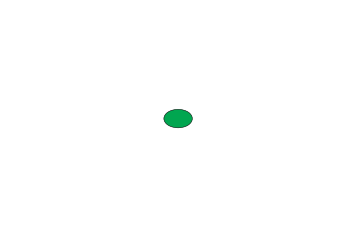

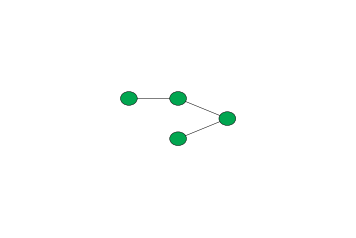

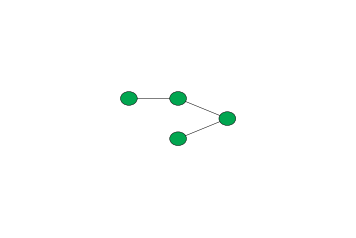

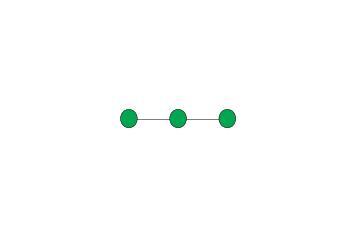

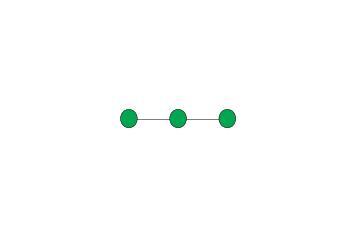

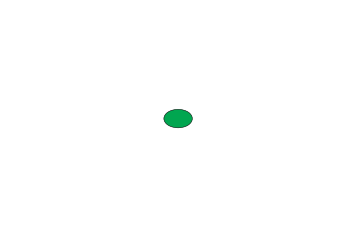

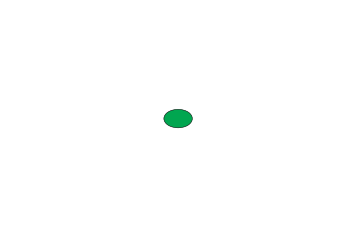

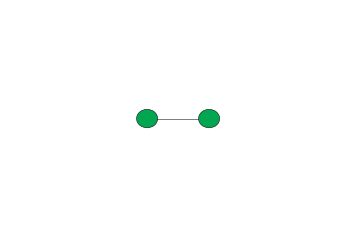

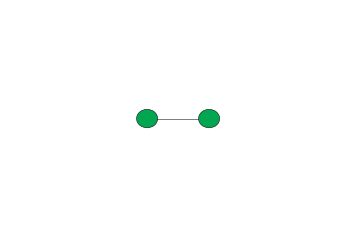

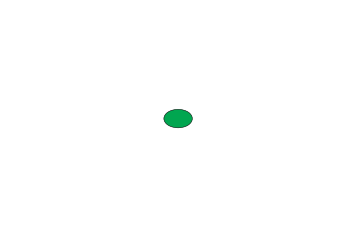

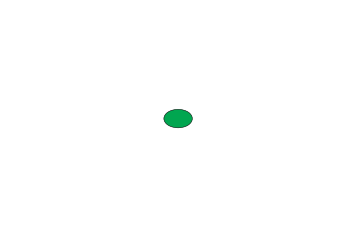

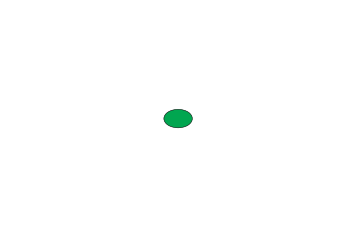

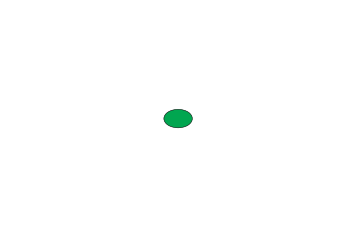

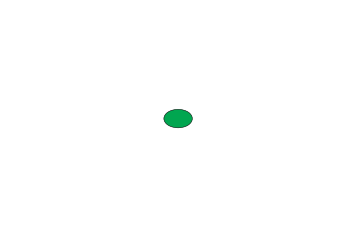

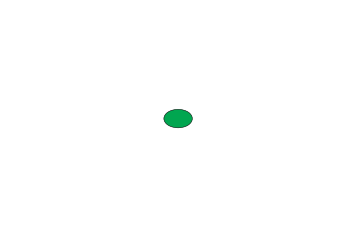

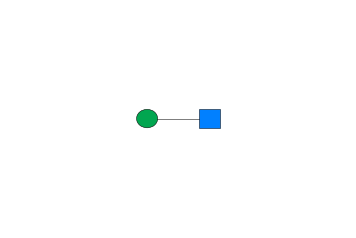

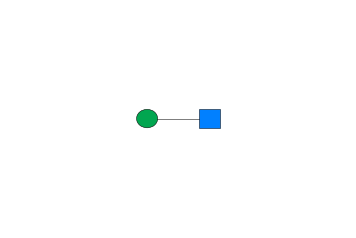

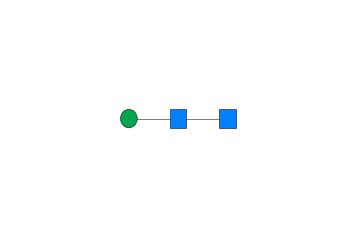

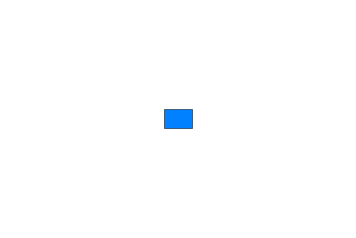

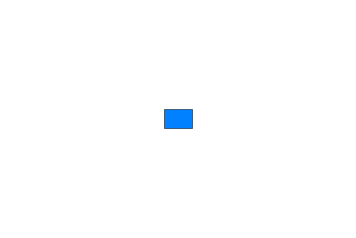

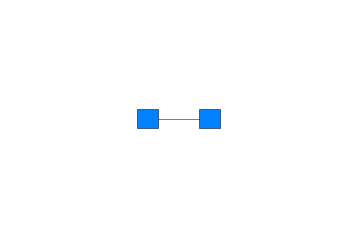

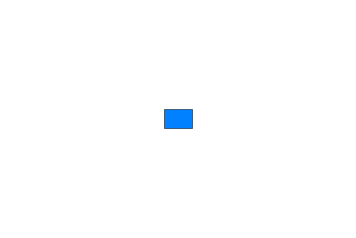

In [112]:
ligand_plottables = set()
ligand_unplottables = set()
for each_match in my_ligand_matches:
    each_lc = str_join('', each_match)
    try:
        parsePlot(each_lc)
        ligand_plottables.add(each_lc)
    except Exception as e:
        ligand_unplottables.add(each_lc)

'Well-formed' (plottable/`glypy`-parseable) matches to the ligand wildcard are all
 - chains
 - chains with (sub)trees (which may be trees or themselves contain trees, which ...)
 - chains with subtrees, but where in at least one case (viz. when the match ends with a left parenthesis), the stem and a right branch are captured by the wildcard, but the left branch is not.

In [113]:
len(ligand_plottables)

101

In [114]:
list(ligand_plottables)

['Ab4GNb2Ma3',
 '(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 'NNa',
 '(Ma3)Ma3(Ma3Ma6)Ma6',
 'Ab4GNb2',
 'GNb',
 'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Mb4(Ma3)GNb',
 'Mb4GNb4',
 '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Ma6(Ma3)Ma',
 '(Ma3)Ma3(Ma3Ma6)Ma',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma',
 'Mb4',
 'GN',
 '(Ma3)Ab',
 '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '(Ma3)Ma3',
 '(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 'Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 'GNb2Ma3',
 'Ma6(Ma3)Ab4GNb',
 'Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '(Ma3)Ab4GNb2',
 'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 'NNa6Ma6(Ma3)Ab',
 'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 'NNa6Ma6',
 '(Mb4(

In [115]:
#These all either
#  - end with a bond location or start with a parenthesis
ligand_unplottables

{'(Ma3)',
 '(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)',
 '(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '(Ma3)Ma3(Ma3Ma6)',
 '(Ma3Ma6)',
 '(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '(Mb4(Ma3)GNb4)',
 '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '2',
 '2Ma',
 '2Ma3',
 '2Ma3(Mb4(Ma3)GNb4)',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '3',
 '3(Ma3Ma6)',
 '3(Ma3Ma6)Ma',
 '3(Ma3Ma6)Ma6',
 '3(Mb4(Ma3)GNb4)',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '3Ma',
 '3Ma6',
 '4',
 '4(Ma3)',
 '4(Ma3)GNb',
 '4(Ma

In [68]:
# for lce in LCEs:
#     print("{0}: {1}".format(lce, get_ligand_matches(lce)))

## Krambeck et al. 2009's `continuation` "_"

`_` is supposed to match "Any string (possibly empty) where every '(' is matched with a following ')'" (Table 7)

In [69]:
def is_continuation_match(linear_code_expression):
    '''
    Indicates whether `linear_code_expression` (in its entirety) matches (i.e.
    could be substituted with/for `_`).
    '''
    s = linear_code_expression
    if len(s) == 0:
        return True
    return every_left_paren_has_a_right_paren(s)

In [70]:
def get_continuation_matches(linear_code_expression, as_generator=False, with_contexts=False):
    '''
    Returns the substrings within `linear_code_expression` that match Krambeck
    et al's `continuation` wildcard `_`.
    '''
    s = linear_code_expression
    subsequences = generate_subsequences(list(tokenizer(s)), True, with_contexts)
#     subsequences = generate_subsequences(s, True)
    if as_generator:
        return (is_continuation_match(subseq) 
                for subseq in subsequences)
    else:
        return tuple(filter(is_continuation_match, subsequences))

'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'

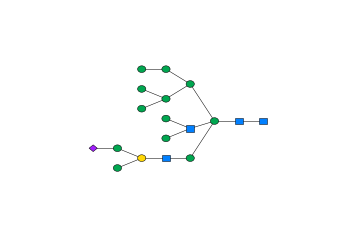

In [116]:
my_tree
parsePlot(my_tree)

In [117]:
my_continuation_matches, my_continuation_nonmatches = split(is_continuation_match, 
                                                            generate_subsequences(tokenizer(my_tree)))

len(my_continuation_matches), len(my_continuation_nonmatches)

(490, 638)

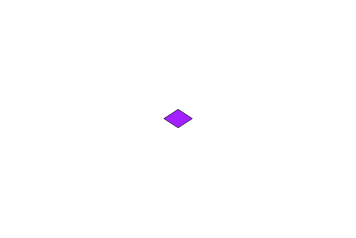

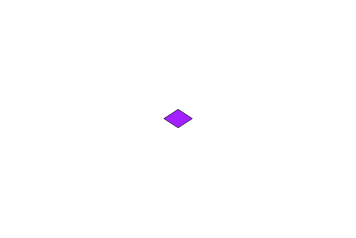

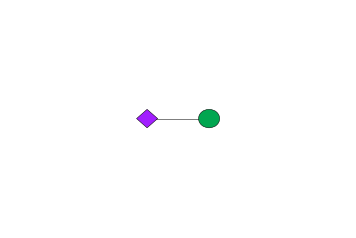

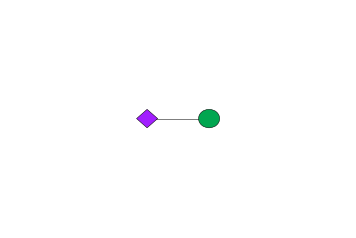

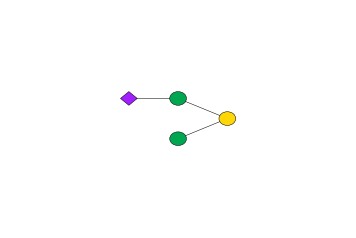

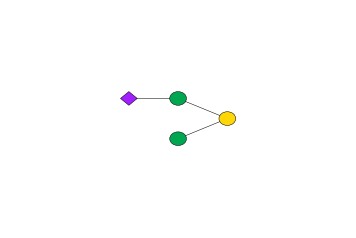

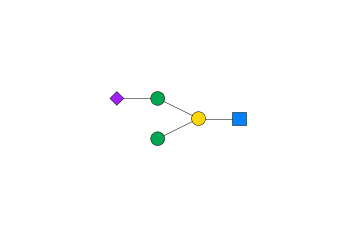

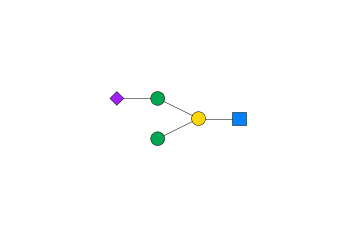

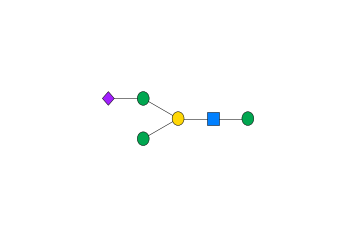

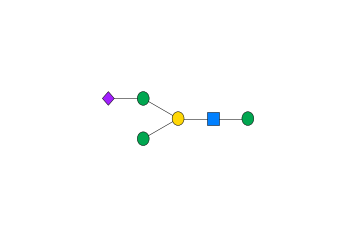

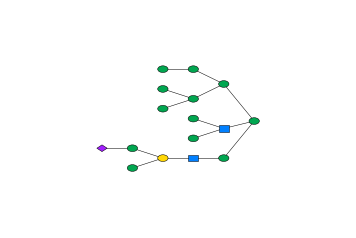

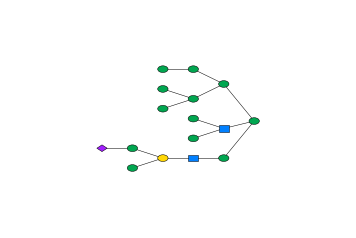

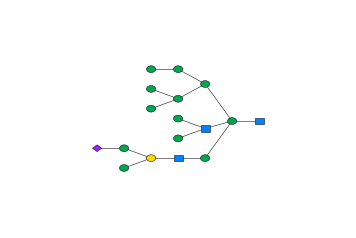

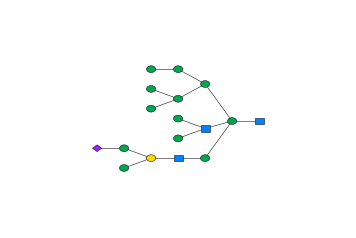

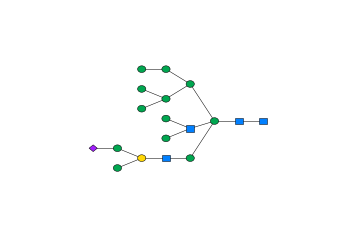

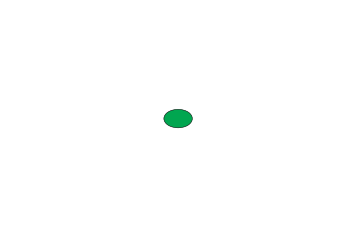

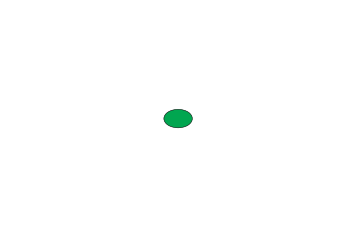

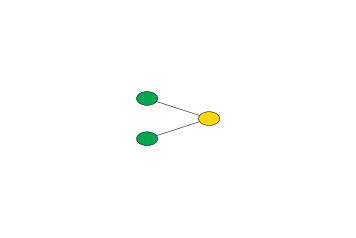

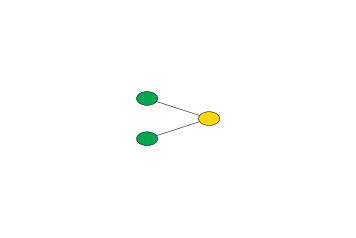

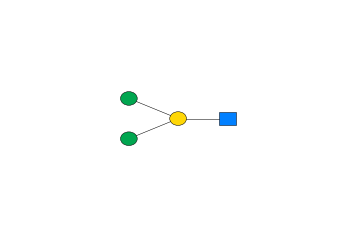

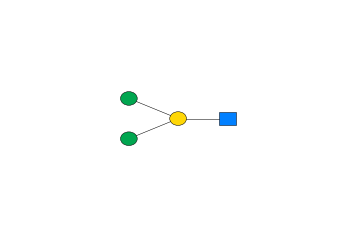

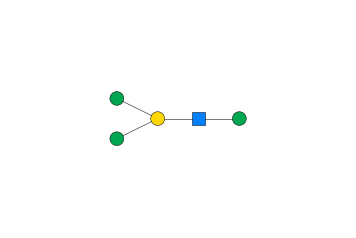

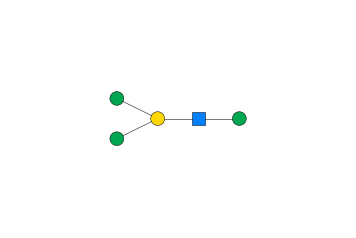

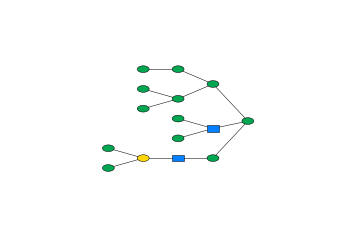

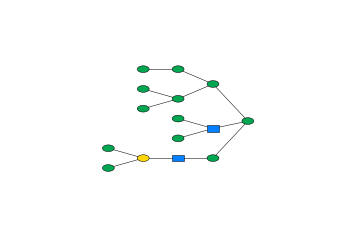

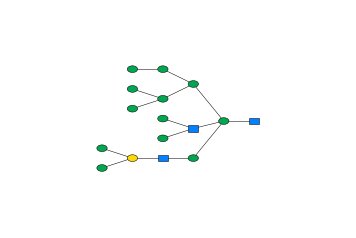

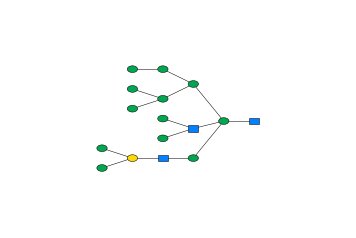

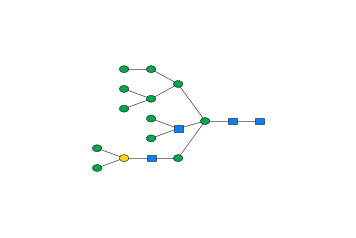

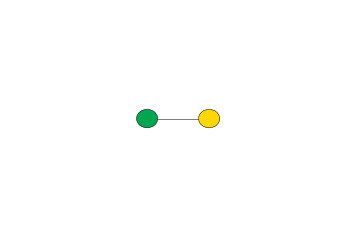

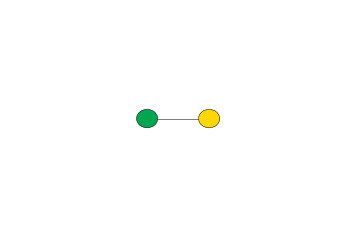

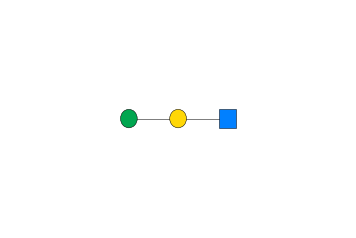

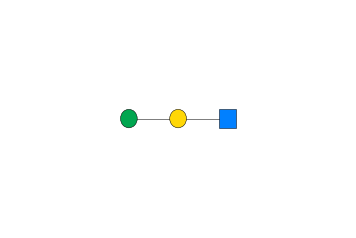

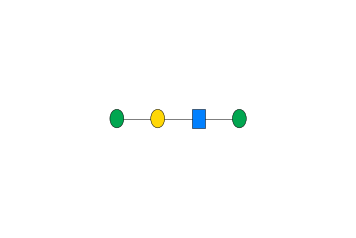

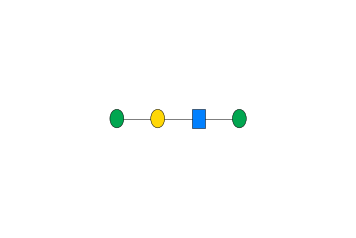

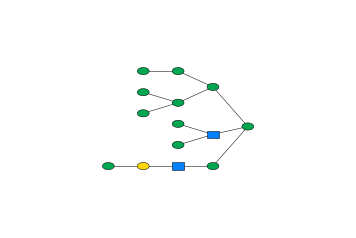

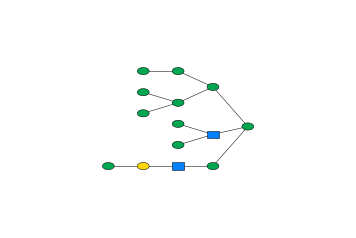

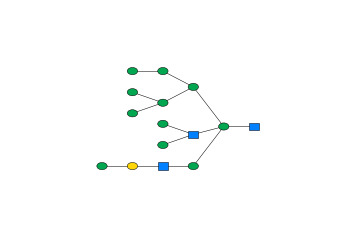

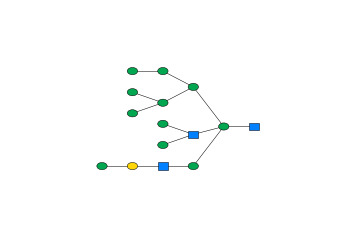

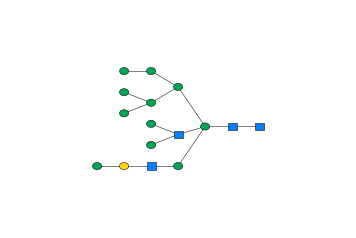

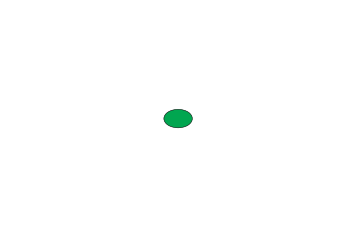

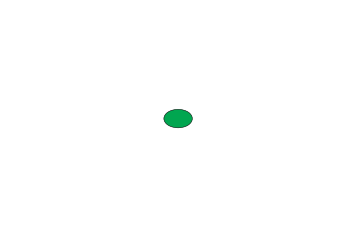

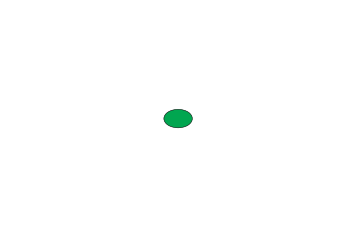

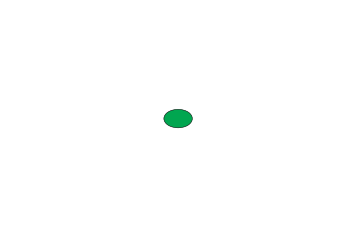

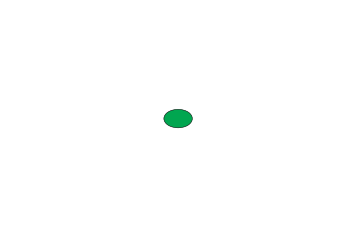

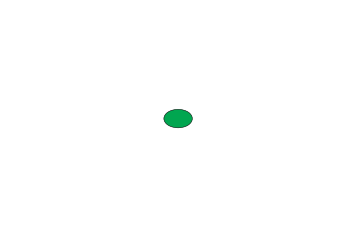

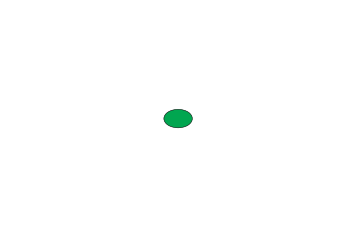

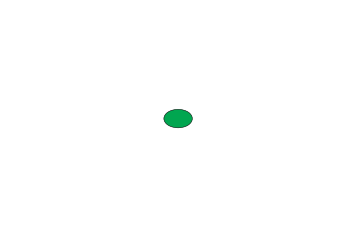

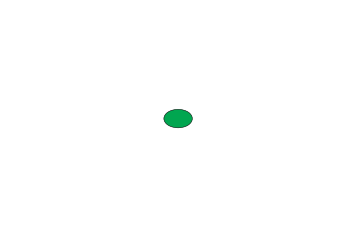

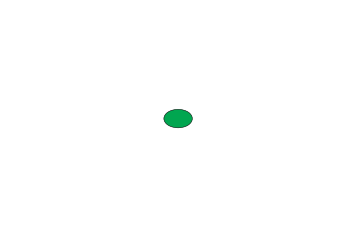

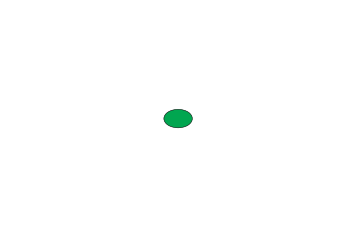

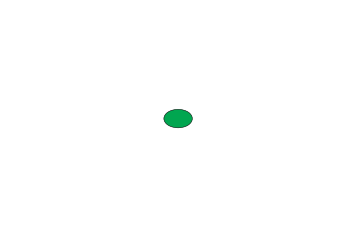

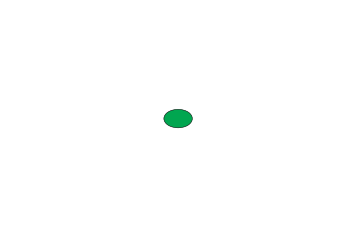

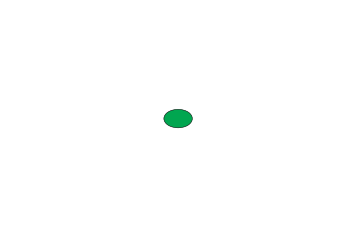

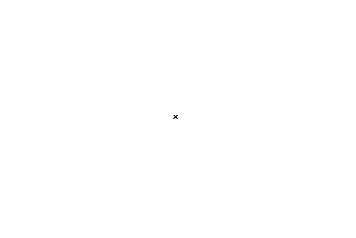

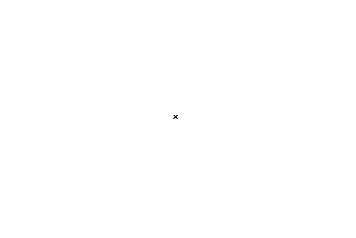

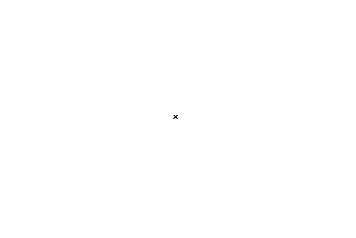

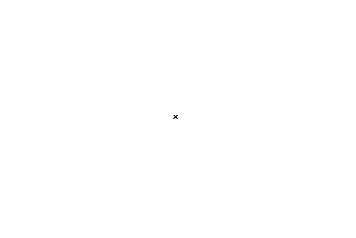

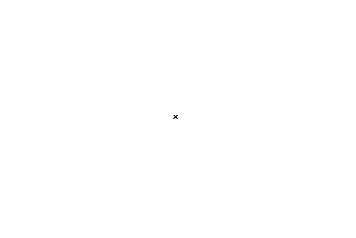

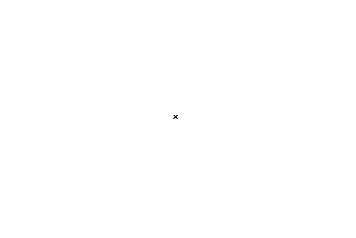

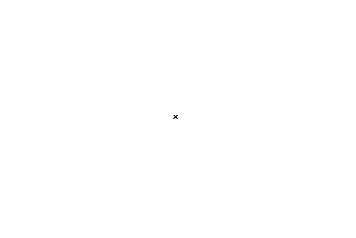

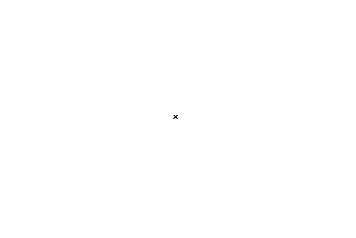

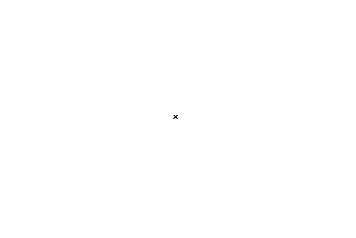

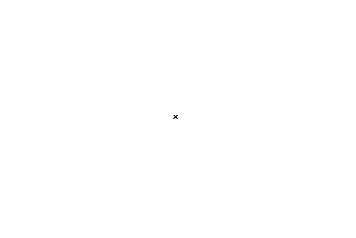

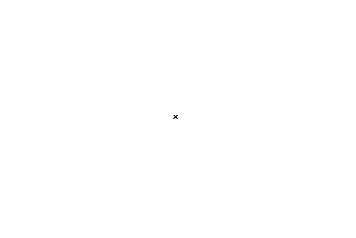

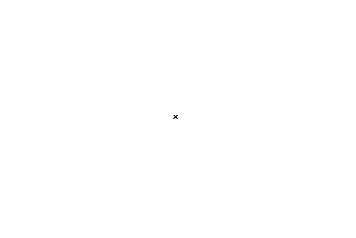

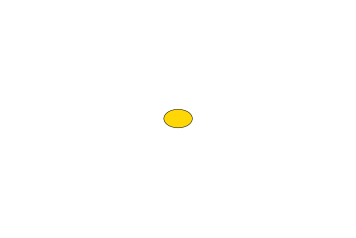

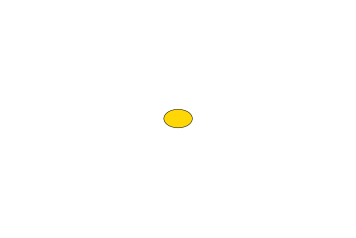

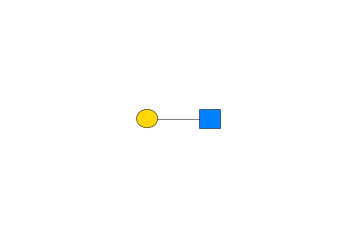

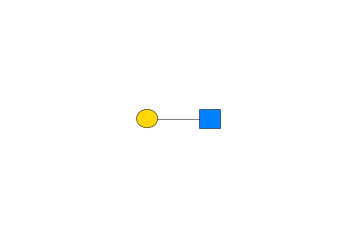

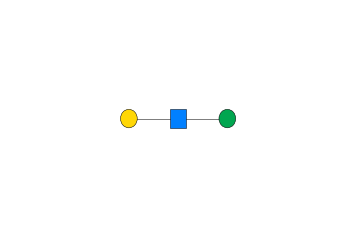

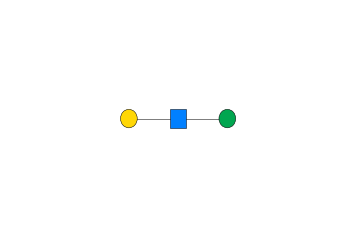

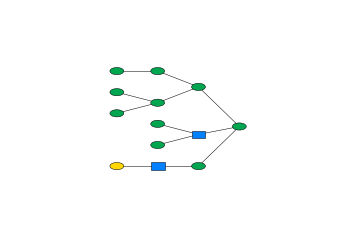

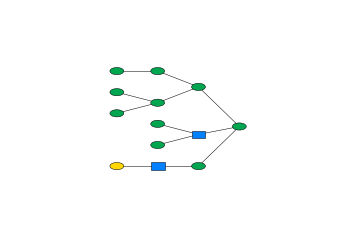

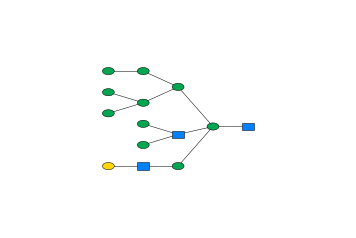

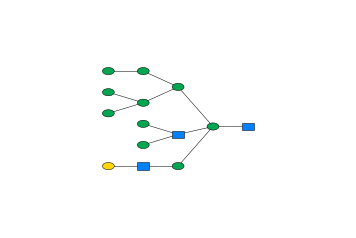

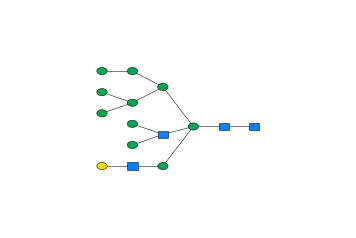

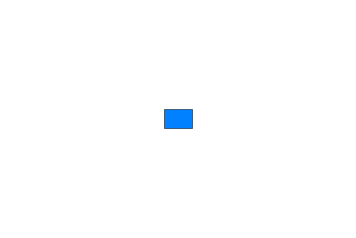

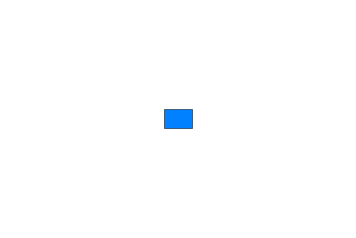

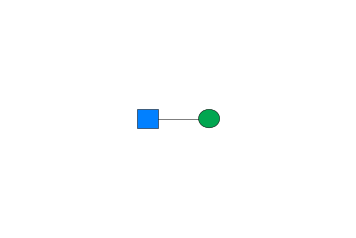

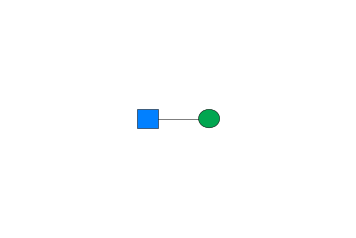

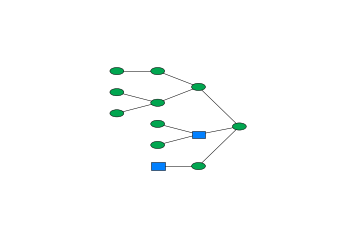

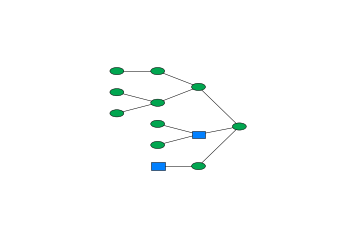

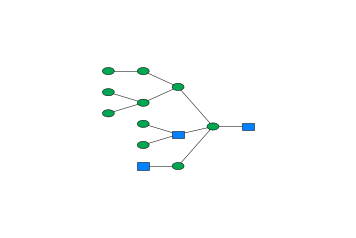

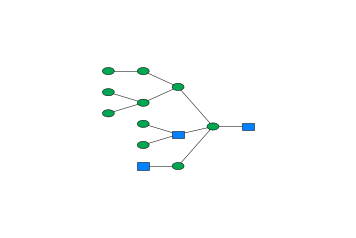

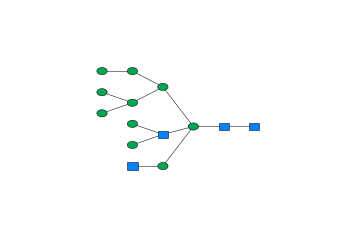

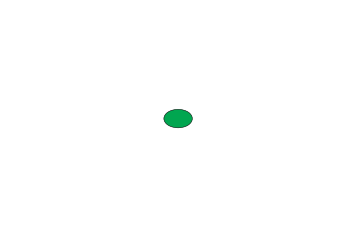

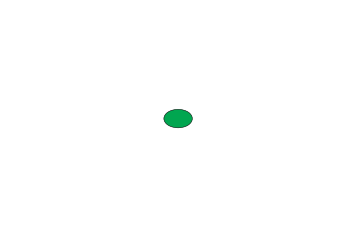

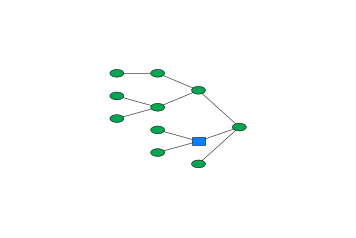

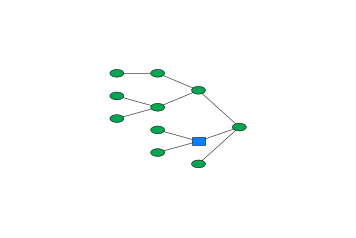

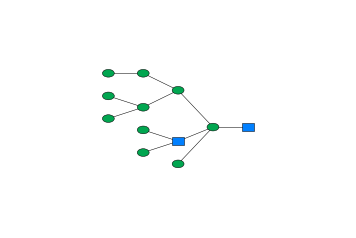

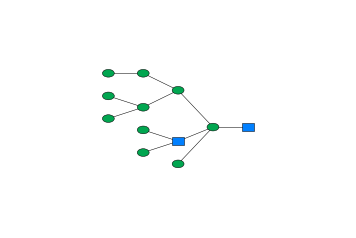

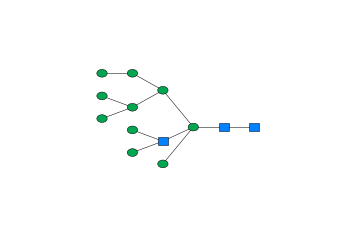

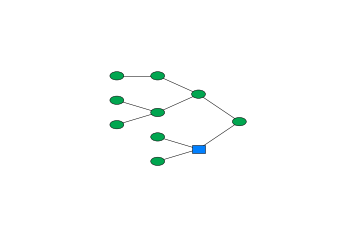

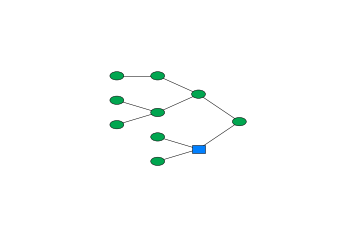

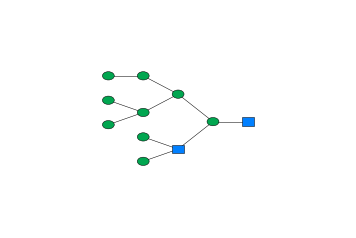

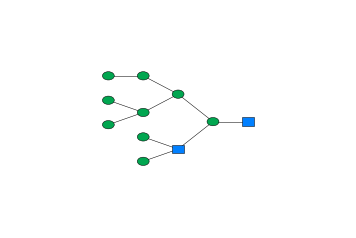

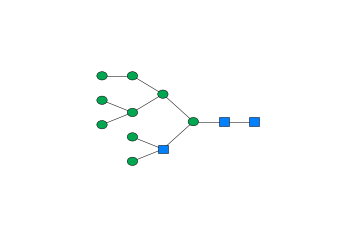

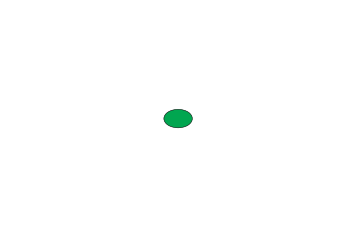

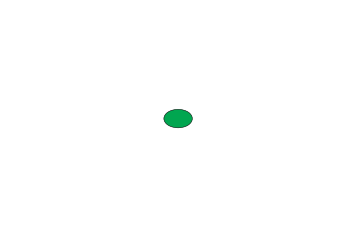

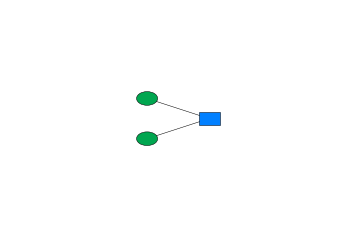

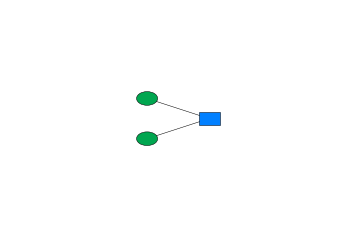

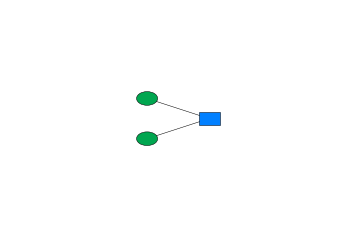

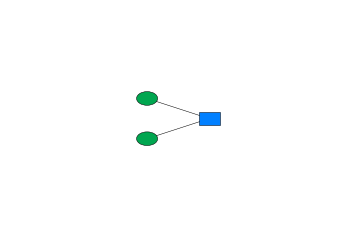

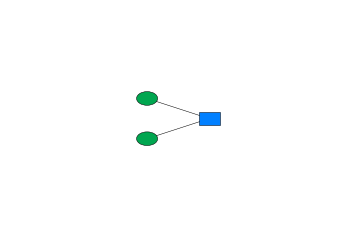

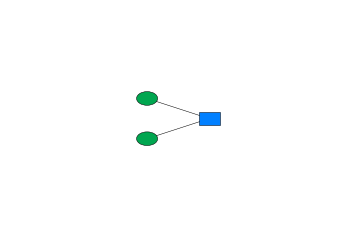

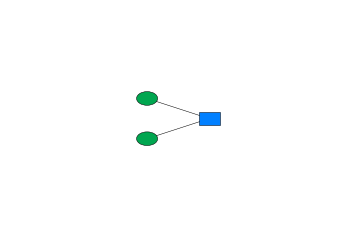

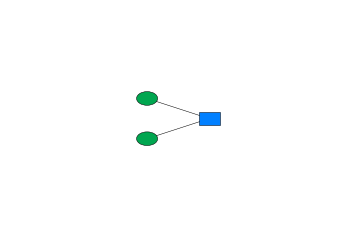

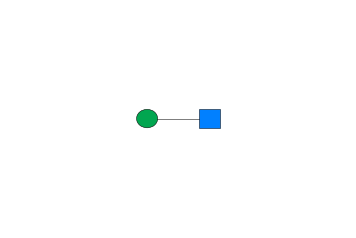

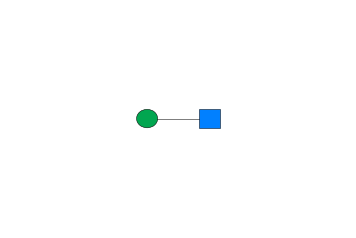

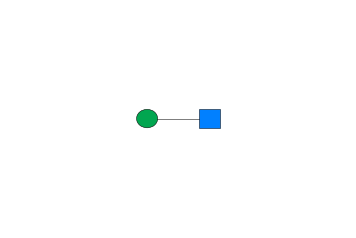

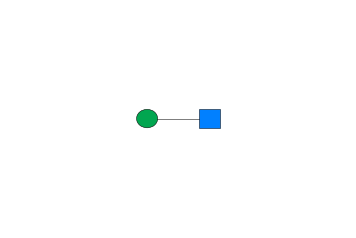

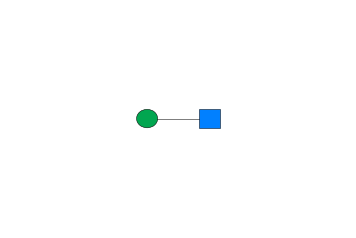

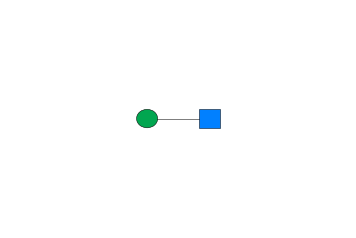

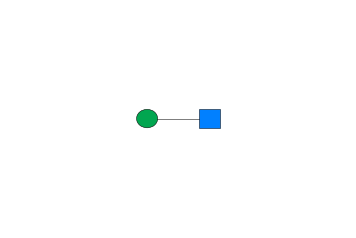

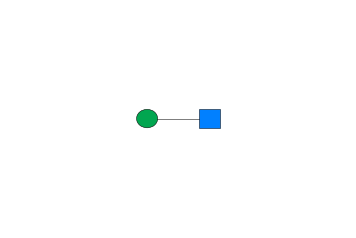

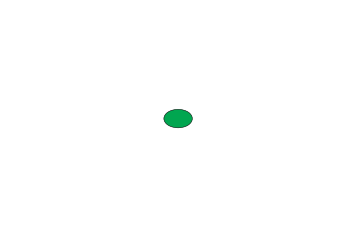

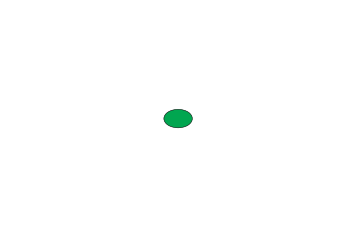

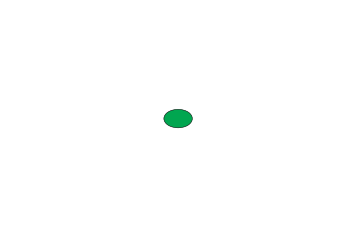

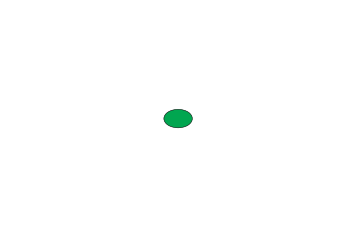

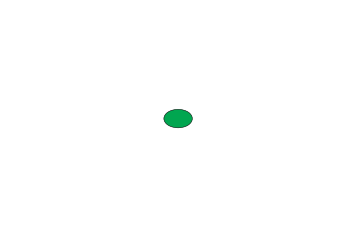

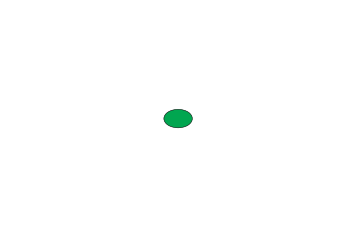

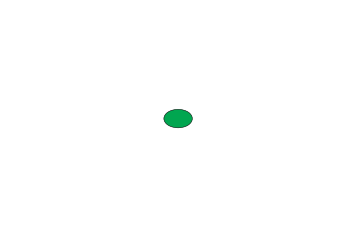

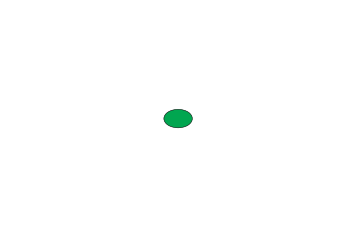

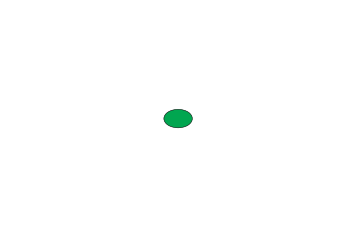

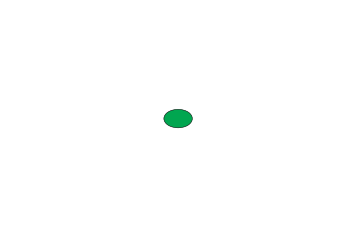

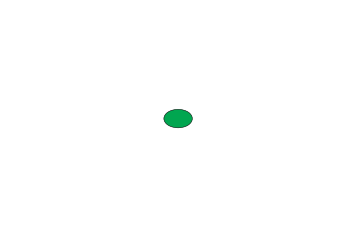

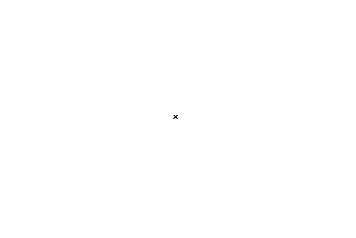

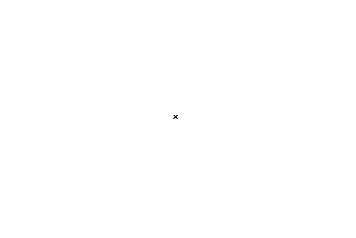

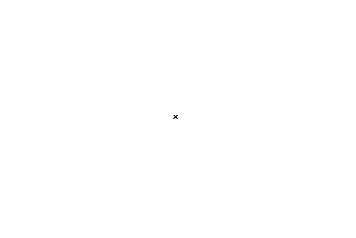

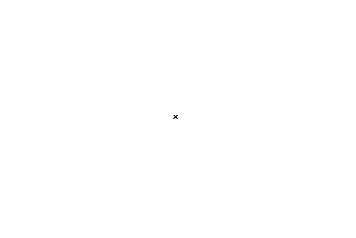

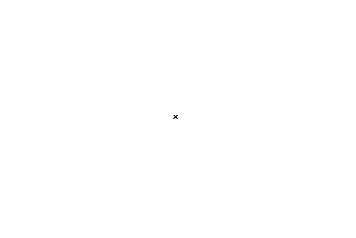

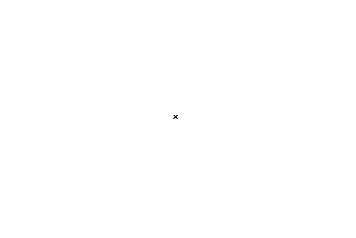

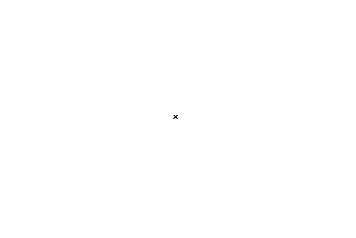

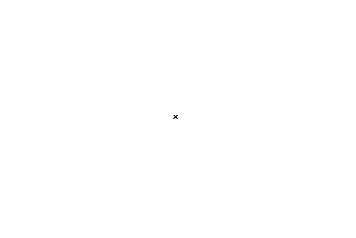

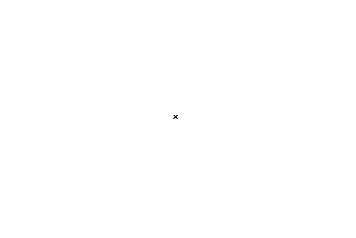

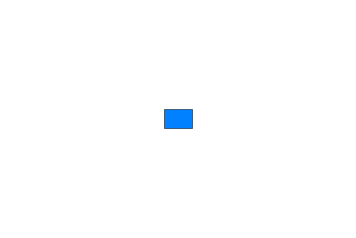

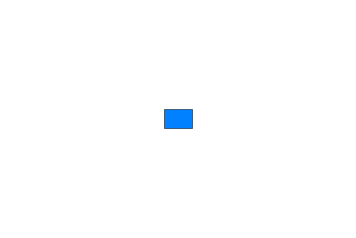

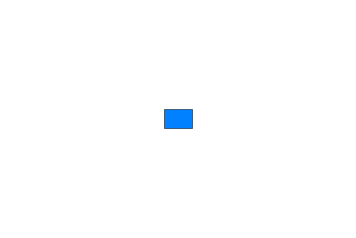

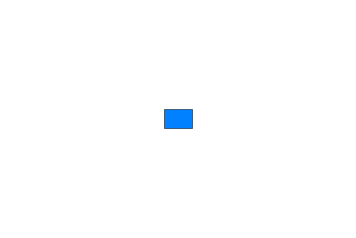

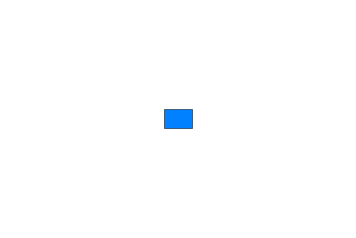

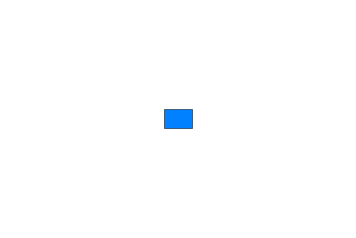

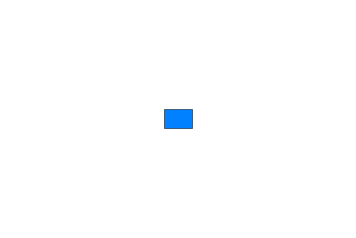

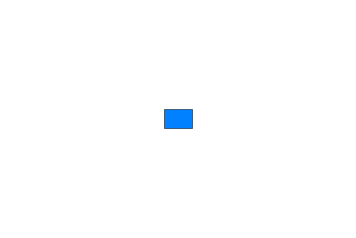

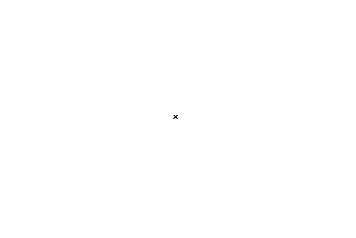

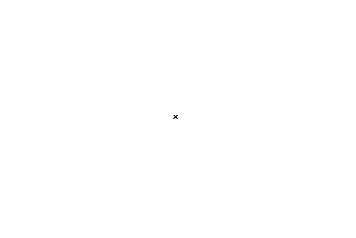

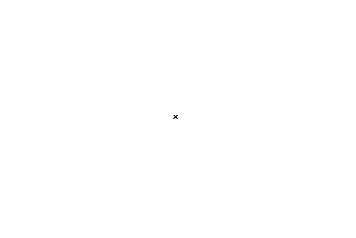

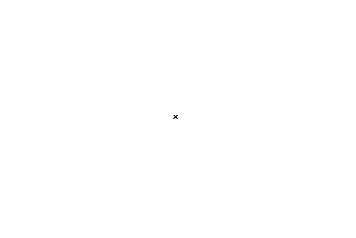

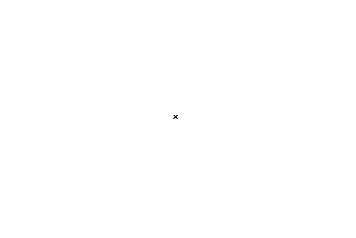

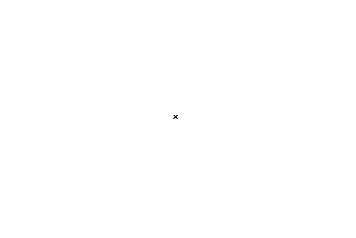

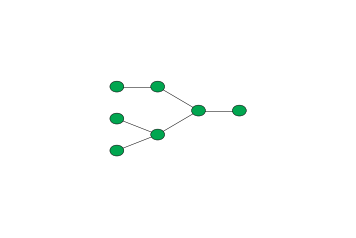

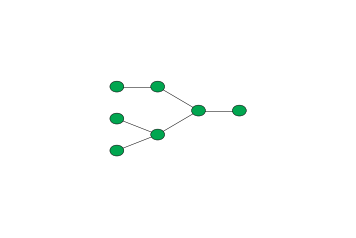

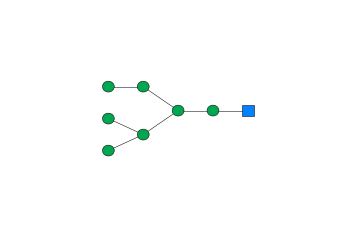

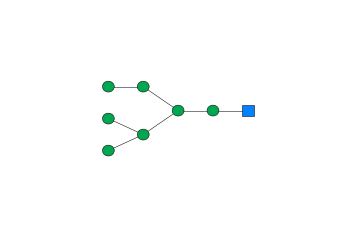

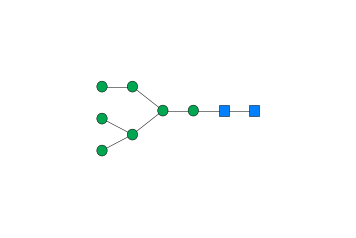

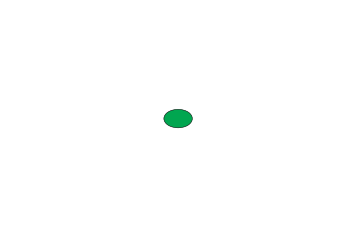

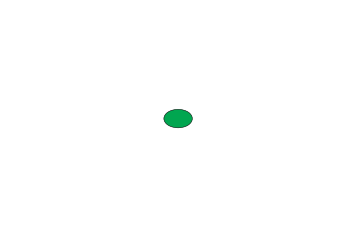

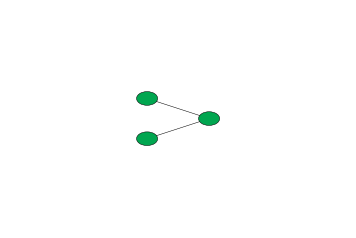

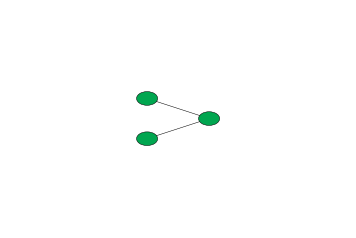

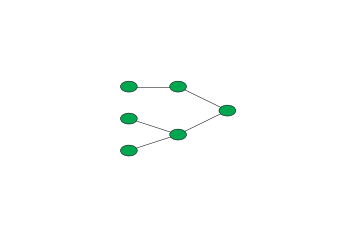

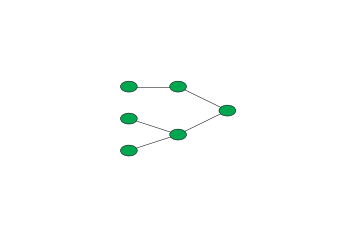

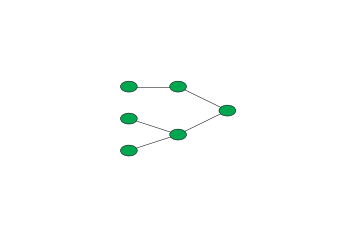

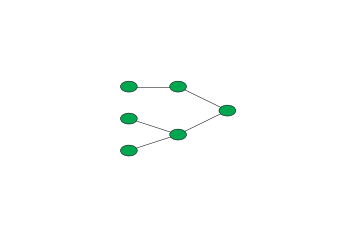

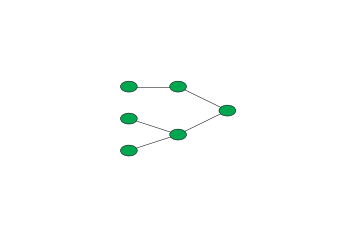

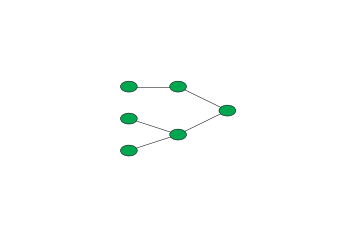

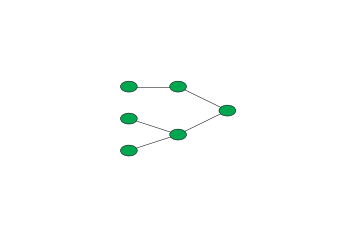

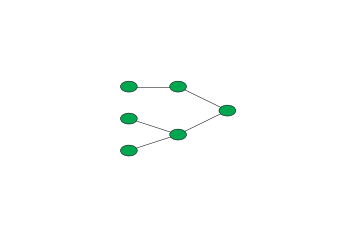

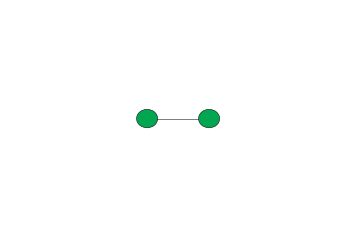

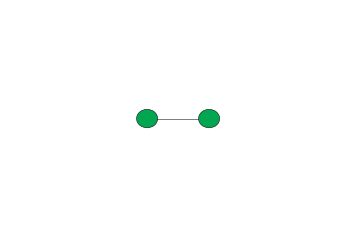

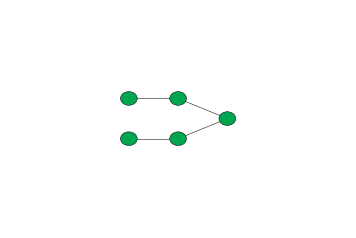

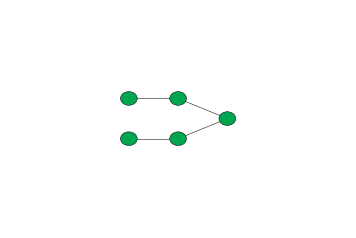

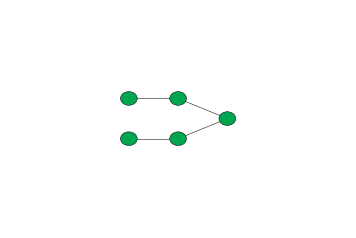

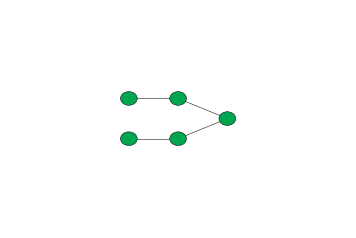

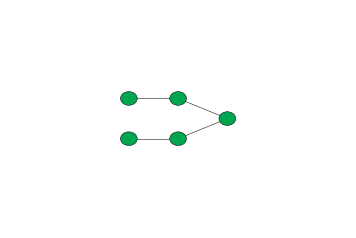

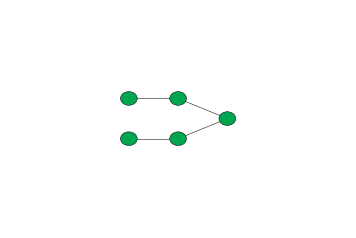

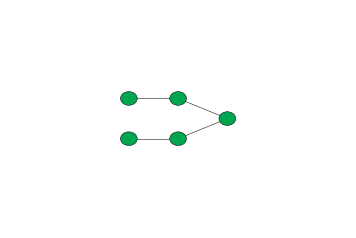

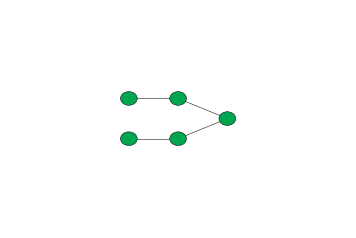

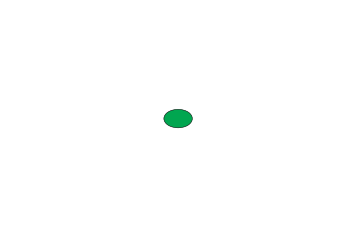

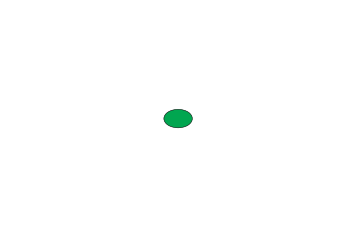

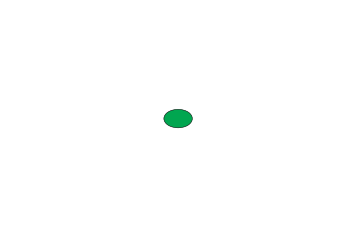

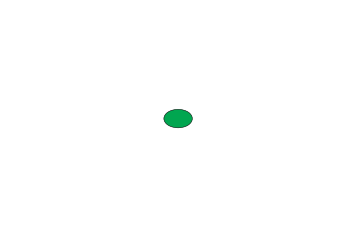

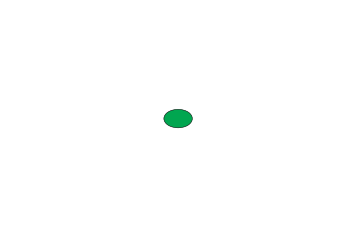

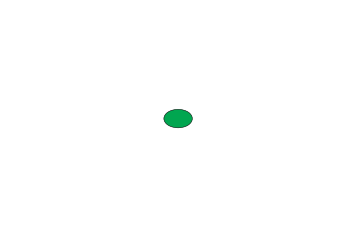

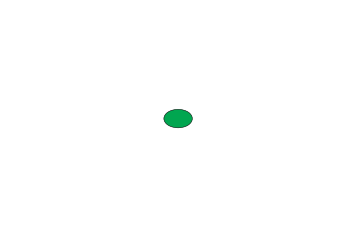

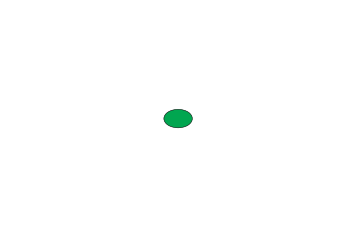

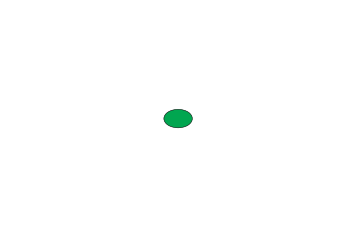

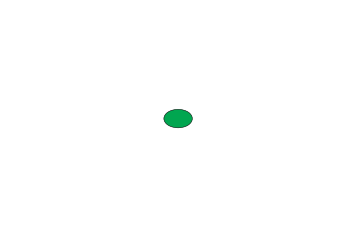

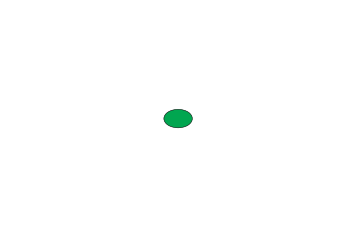

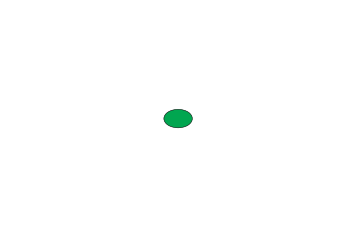

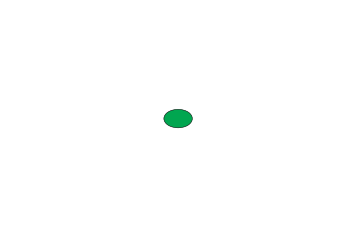

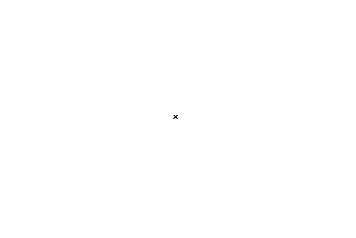

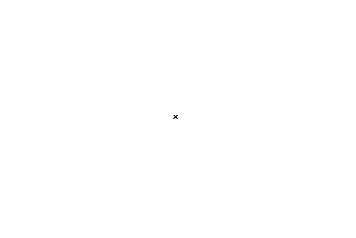

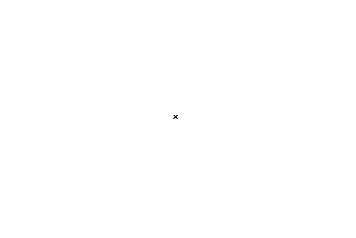

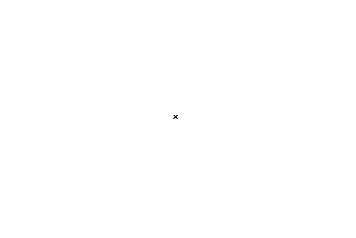

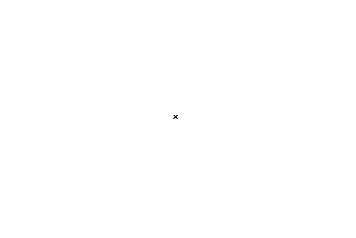

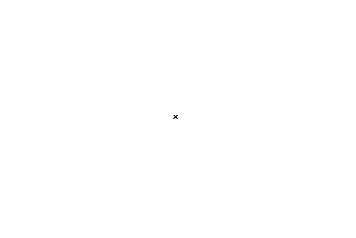

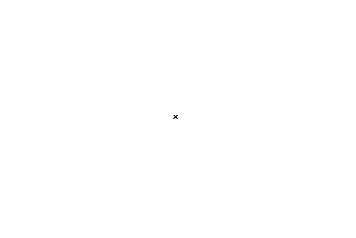

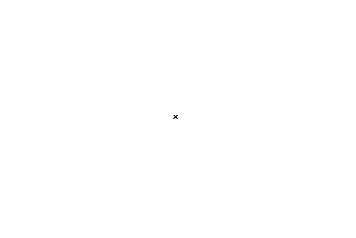

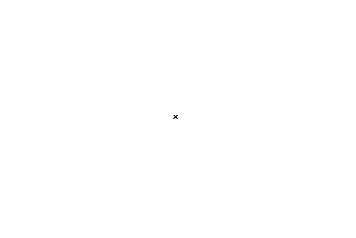

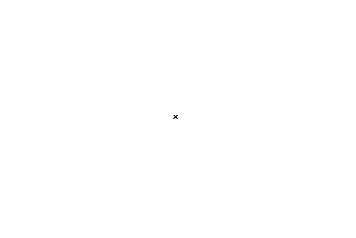

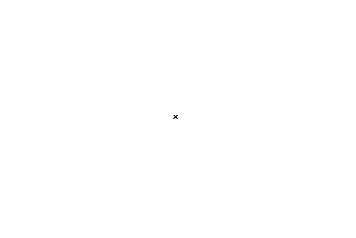

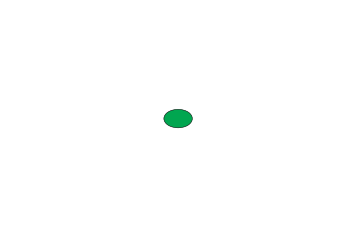

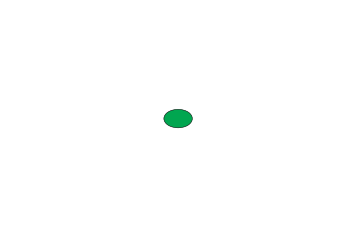

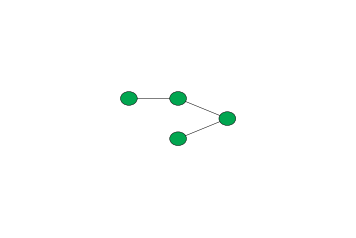

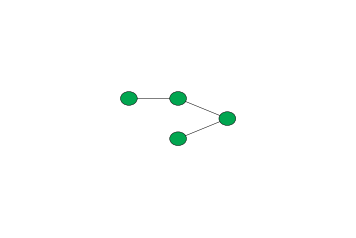

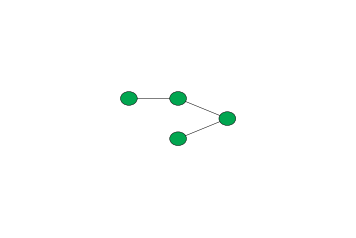

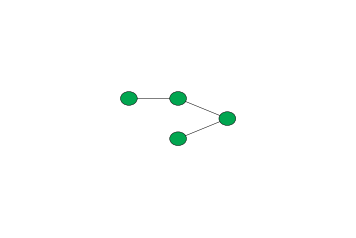

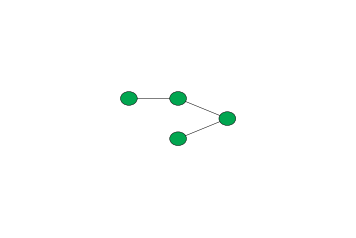

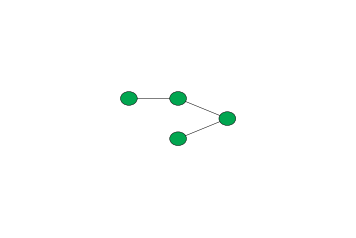

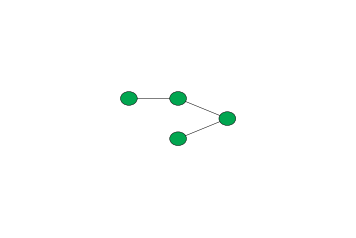

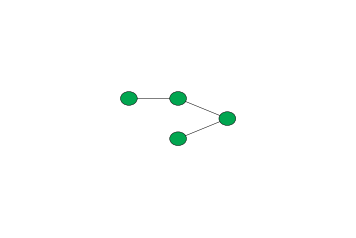

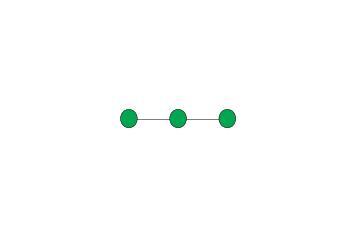

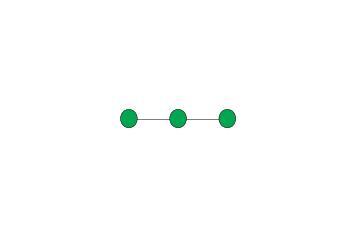

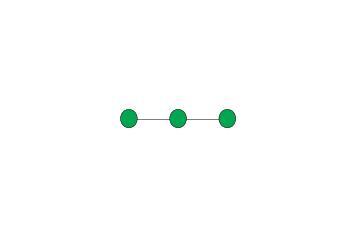

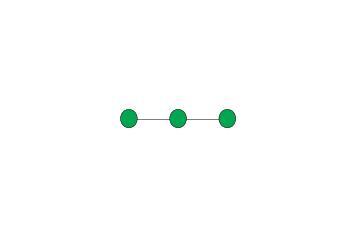

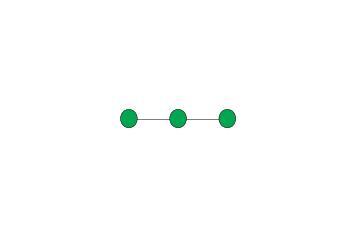

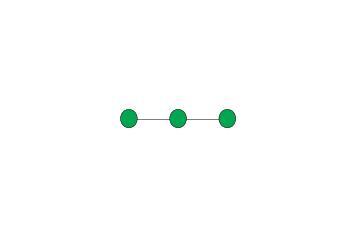

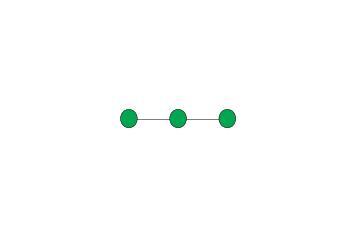

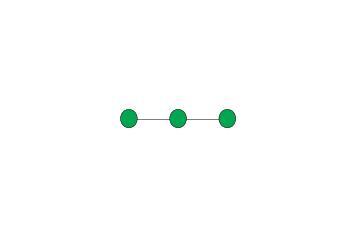

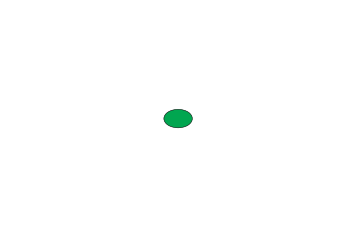

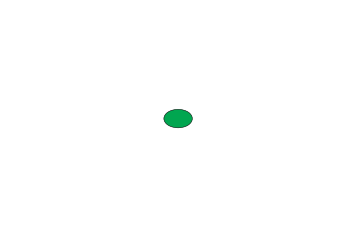

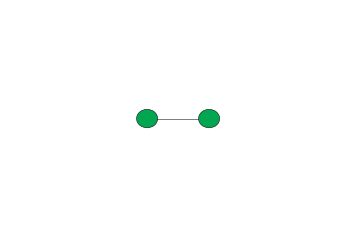

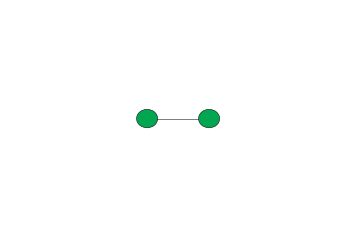

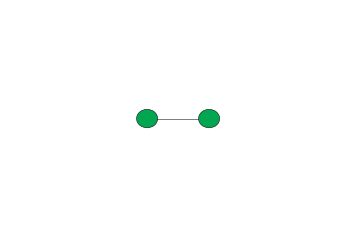

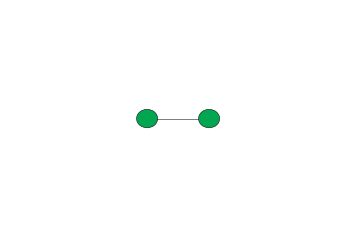

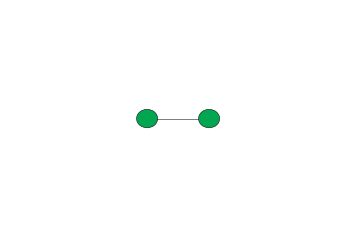

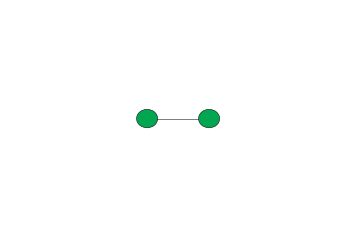

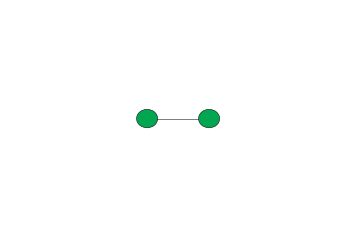

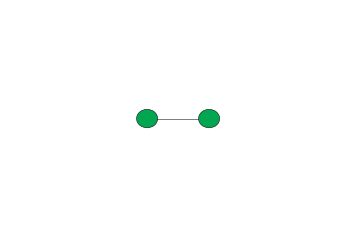

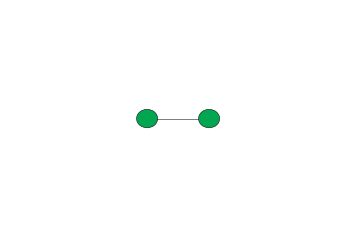

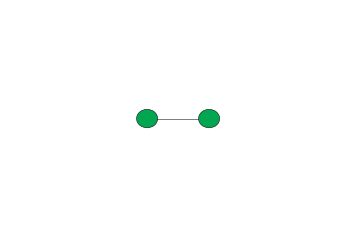

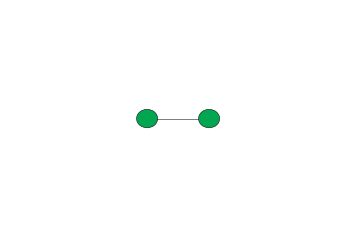

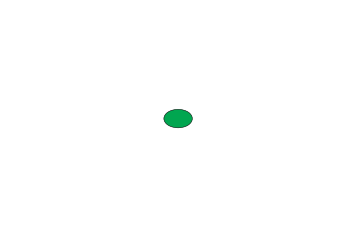

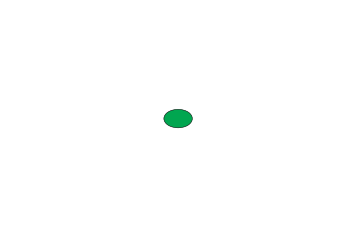

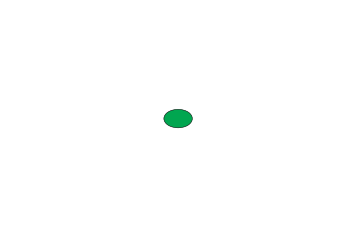

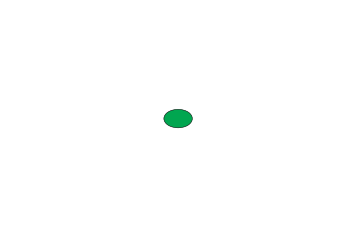

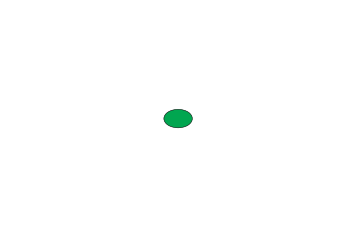

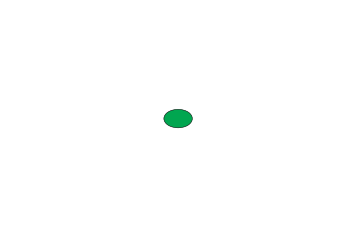

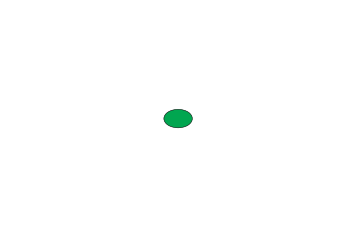

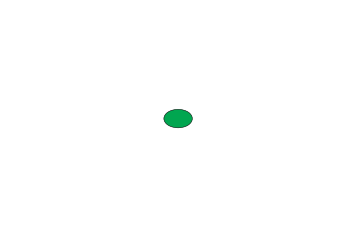

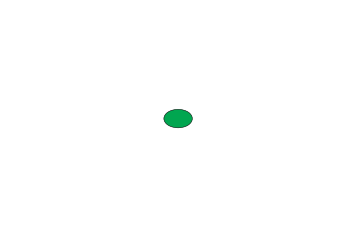

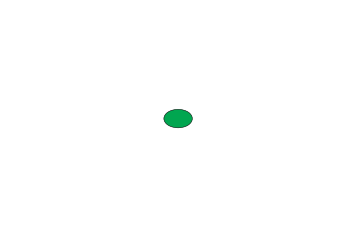

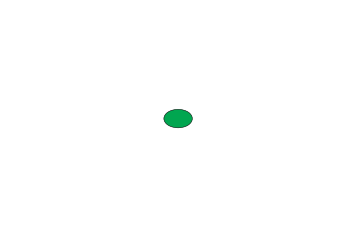

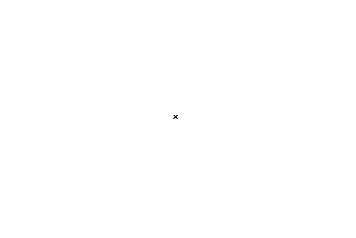

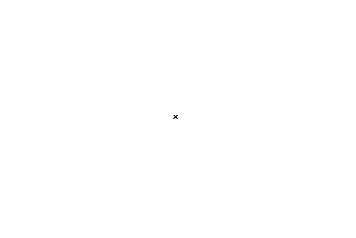

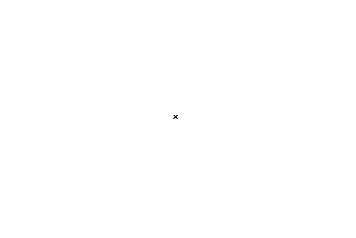

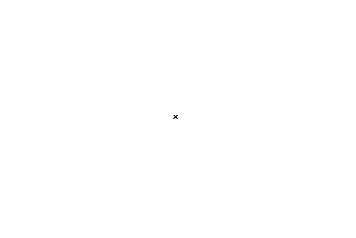

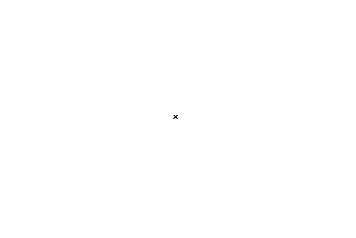

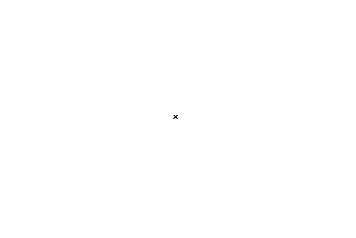

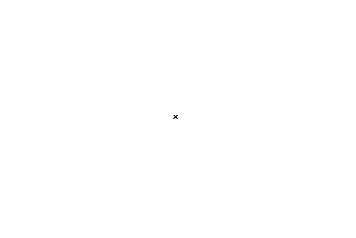

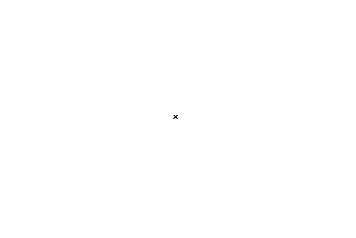

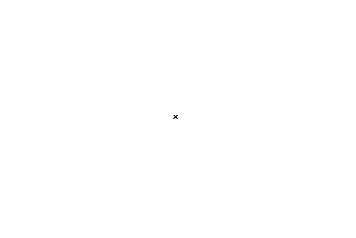

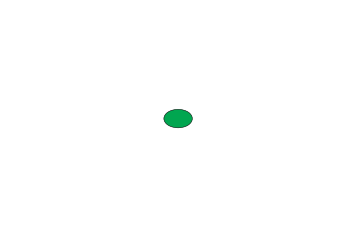

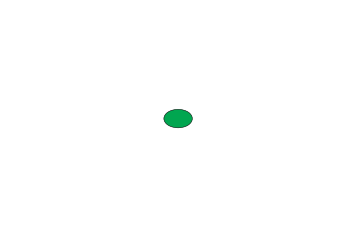

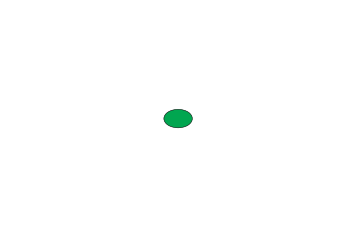

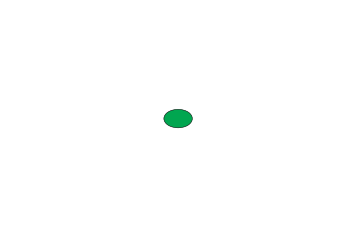

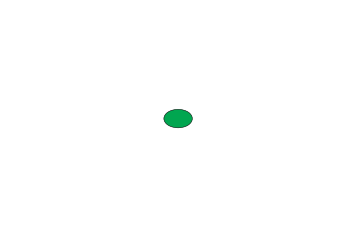

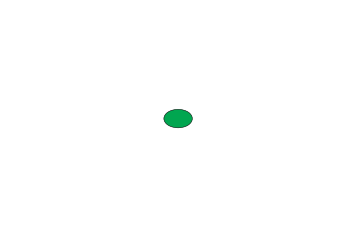

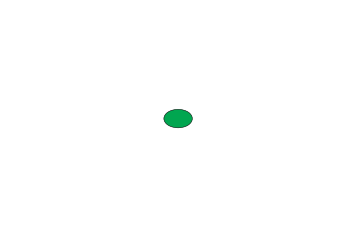

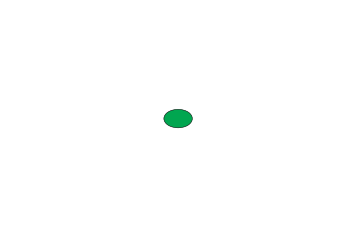

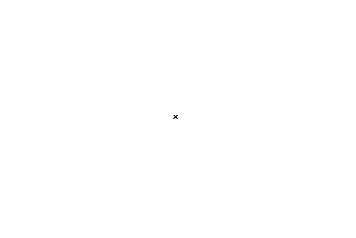

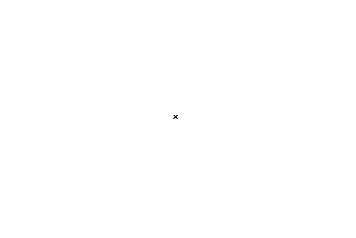

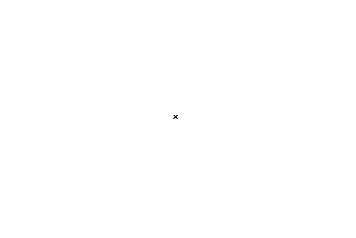

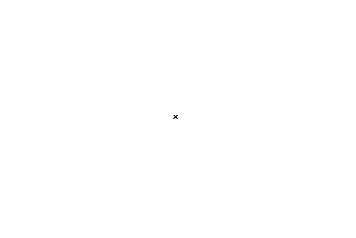

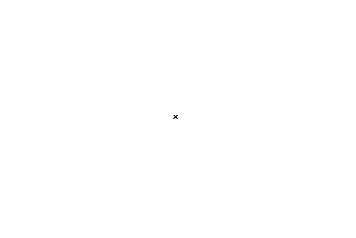

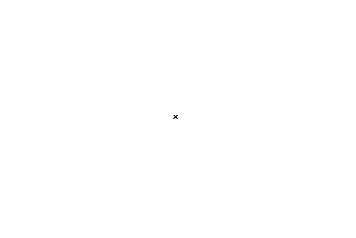

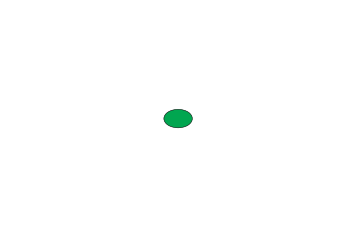

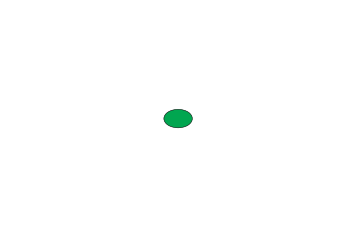

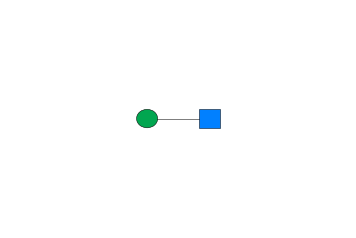

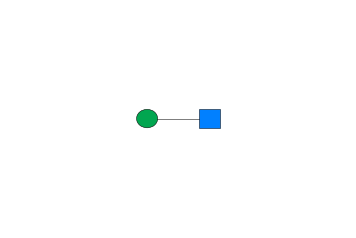

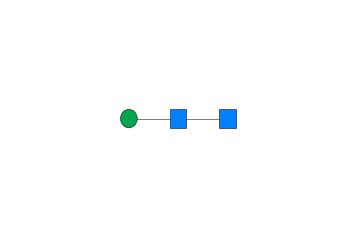

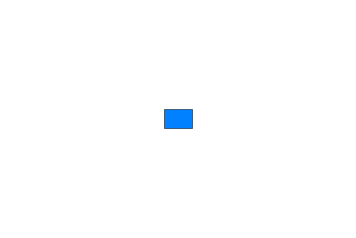

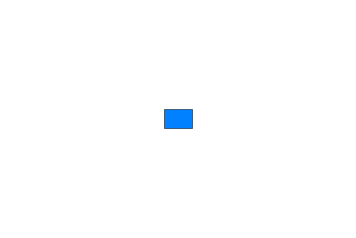

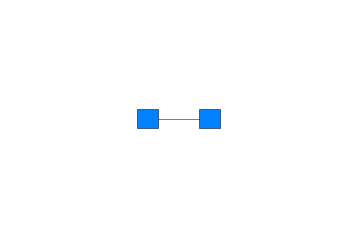

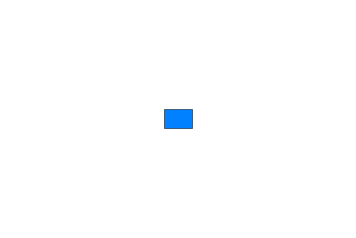

In [118]:
continuation_plottables = set()
continuation_unplottables = set()
for each_match in my_continuation_matches:
    each_lc = str_join('', each_match)
    try:
        parsePlot(each_lc)
        continuation_plottables.add(each_lc)
    except Exception as e:
        continuation_unplottables.add(each_lc)

In [119]:
my_tree

'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'

In [120]:
list(continuation_plottables)

['(Ma3)GNb4)',
 'GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 'Ab4GNb2Ma3',
 '(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 'NNa',
 ')Ma6)',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 ')Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 '(Ma3)Ma3(Ma3Ma6)Ma6',
 'Ab4GNb2',
 ')GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Ma6)Mb4GNb4',
 'Ma6)Mb4',
 'GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 'Mb4(Ma3)GNb',
 'Ma3Ma6)Ma6',
 'Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 ')(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Mb4GNb4',
 '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Ma6)Ma6',
 'Ma3Ma6)Ma6)Mb',
 'Ma6(Ma3)Ma',
 '(Ma3)Ma3(Ma3Ma6)Ma',
 ')GNb',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma',
 'Ma6)Ma6)Mb4',
 'Mb4',
 'GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'Ma3(Ma3Ma6)Ma6)Mb',
 'GN

In [121]:
list(continuation_unplottables)

['3Ma6)Ma6)Mb4',
 '(Ma3)Ma3(Ma3Ma6)',
 '4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 '6(Ma3)Ab4GNb2',
 '4(Ma3)GNb',
 '6Ma6(Ma3)Ab4GNb',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '6Ma6(Ma3)Ab',
 '4(Ma3)',
 '6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 'GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '3(Ma3Ma6)Ma',
 '(Mb4(Ma3)GNb4)',
 '3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 'Ma6(Ma3)',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb2',
 '3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '3)GNb',
 '4GN',
 '4(Ma3)GNb4)',
 '4(Ma3)GNb4',
 ')GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '6(Ma3)Ma3(Ma3Ma6)Ma',
 '2',
 '6)Ma6)Mb4',
 '6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)',
 '3)Ab4',
 '6Ma6(Ma3)Ab4GNb2Ma',
 '6)Ma6',
 '6Ma6(Ma3)',

## Identifying what continuation wildcards can capture that ligand wildcards can't

Recall that all matches are based on:

'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'

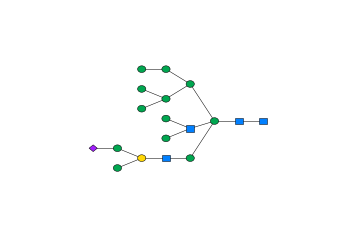

In [122]:
my_tree
parsePlot(my_tree)

### Continuation matches are a superset of ligand matches

In [123]:
len(my_ligand_matches)
len(my_continuation_matches)

241

490

In [124]:
len(set(map(tuple, my_ligand_matches)))
len(set(map(tuple, my_continuation_matches)))

my_ligand_matches_unique = set(map(tuple, my_ligand_matches))
my_continuation_matches_unique = set(map(tuple, my_continuation_matches))

201

438

In [125]:
len(my_ligand_matches_unique - my_continuation_matches_unique)
len(my_continuation_matches_unique - my_ligand_matches_unique)

0

237

As might be expected from their definitions, `ligand` wildcard matches are a proper subset of `continuation` matches.

### What's unique to continuation matches?

Let's take a look at what's unique to `continuation` matches relative to `ligand` matches:

In [126]:
map(partial(str_join, ''),
    (my_continuation_matches_unique - my_ligand_matches_unique))

# map(partial(str_join, ' '),
#     (my_continuation_matches_unique - my_ligand_matches_unique))

['Ma3)Ma3(Ma3Ma6)Ma6',
 ')GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '3Ma6)Ma6)Mb4GNb4',
 '6)',
 '3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)',
 '3)Ab4GNb2Ma',
 'Ma3Ma6)Ma6)',
 '4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 'Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'Ma6)Mb4GNb4',
 '4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 ')GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 ')Ma',
 '(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 ')Ma6',
 '3(Ma3Ma6)Ma6)',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 '3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)',
 'GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 '3)Ma3(Ma3Ma6)Ma6)Mb4',
 'Ma6)Ma6)Mb4',
 '3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 ')Ab4GNb2Ma',
 '(Ma3)Ma3(Ma3Ma6)Ma6)',
 ')Mb',
 '6(Ma3)Ma3(Ma3Ma6)Ma6)',
 ')Ma3(Ma3Ma6)Ma6',
 '6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 'Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)',
 'GNb4)',
 '4(Ma3)GNb4)',
 ')Ma6)',
 'Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '3)Ab4GNb

In [127]:
#less garbage than the cell above
set(continuation_plottables) - set(ligand_plottables)

{'(Ma3)GNb4)',
 '(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 '(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 '(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '(Ma3)Ma3(Ma3Ma6)Ma6)',
 '(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 '(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 '(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '(Ma3Ma6)Ma6)',
 '(Ma3Ma6)Ma6)Mb',
 '(Ma3Ma6)Ma6)Mb4',
 '(Ma3Ma6)Ma6)Mb4GNb',
 '(Ma3Ma6)Ma6)Mb4GNb4',
 '(Ma3Ma6)Ma6)Mb4GNb4GN',
 ')',
 ')(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 ')(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 ')(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 ')(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 ')(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 ')Ab',
 ')Ab4',
 ')Ab4GNb',
 ')Ab4GNb2',
 ')Ab4GNb2Ma',
 ')Ab4GNb2Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(

Suppose a continuation wildcard `_` appears in a string `l_r` where `l` and `r` are such that `l_r` is a well-formed linear code expression. Let 'the context (of a continuation token)' denote `l,r`.

Continuation wildcards can match substrings `s` describing trees where at least one node branches, and it is neither the case that 
 - the rightmost subtree `b_r` of this branching is completely specified by `s`: how does it continue? as a chain? as a subtree? if as a subtree, what are its non-rightmost subbranches? All such questions must be answerable by `l`.
 - the branch/subtree `b_l` to the left of `b_r` is described by `s`

Let's see left contexts for continuation matches:

'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'

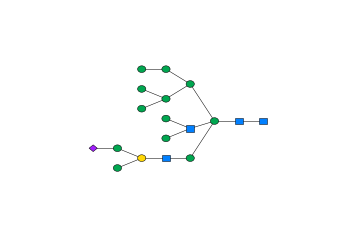

In [128]:
my_tree
parsePlot(my_tree)

In [129]:
my_continuation_matches_w_contexts, _ = split(is_continuation_match, 
                                              generate_subsequences(tokenizer(my_tree), 
                                                                    with_contexts=True))

len(my_continuation_matches_w_contexts)

1128

In [130]:
print(my_continuation_matches_w_contexts[0])

([], ['NNa'], ['6', 'Ma', '6', '(', 'Ma', '3', ')', 'Ab', '4', 'GNb', '2', 'Ma', '3', '(', 'Mb', '4', '(', 'Ma', '3', ')', 'GNb', '4', ')', '(', 'Ma', '6', '(', 'Ma', '3', ')', 'Ma', '3', '(', 'Ma', '3', 'Ma', '6', ')', 'Ma', '6', ')', 'Mb', '4', 'GNb', '4', 'GN'])


'NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'

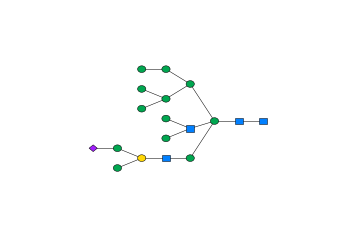

In [133]:
my_tree
parsePlot(my_tree)

In [134]:
plottable_matches_w_contexts = tuple(filter(lambda lcr: lcr[1] in set(continuation_plottables) - set(ligand_plottables),
                                            map(lambda lcr: tuple(map(partial(str_join, ''), lcr)),
                                                my_continuation_matches_w_contexts)))
plottable_matches_w_contexts

(('NNa6Ma6(',
  'Ma3)',
  'Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab',
  '4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4',
  'GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb',
  '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2',
  'Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2Ma',
  '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2Ma3',
  '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
  '4GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
  'GNb4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
  '4GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
  'GN'),
 ('NNa6Ma6(',
  'Ma3)Ab4GNb2Ma3(

In [166]:
def removeUnbalancedCloseParens(s):
    clean_s = ''
    paren_stack = []
    for x in s:
        if x == '(':
            paren_stack.append(x)
            clean_s += x
        elif x == ')':
#             if len(paren_stack) == 0:
#                 return False
#             top = paren_stack[-1]
            if len(paren_stack) > 0:
                paren_stack.pop()
                clean_s += x
        else:
            clean_s += x
    return clean_s

In [170]:
test_cases = ['()', '(())', ')', '())', '))', ')())']

for each in test_cases:
    removeUnbalancedCloseParens(each)

'()'

'(())'

''

'()'

''

'()'

In [182]:
def removeDanglingBondLocation(lce):
    if lce[0] in bonds:
        return lce[1:]
    return lce

In [183]:
def analyze_match(i, matches):
    match = matches[i]
    l = match[0]
    c = match[1]
    r = match[2]
    tree = l + c + r
    ti = 'Whole tree:\n\t{0}'.format(tree)
    
    lci = "Left context:\n\t{0}".format(l)
    mi = "Match:\n\t{0}".format(c)
    rci = "Right context:\n\t{0}".format(r)
    
    print(ti + '\n' + lci + '\n' + mi + '\n' + rci)
    
    parsePlot(l + c + r)
    print('Showing whole tree...')
    
    try:
        parsePlot(l)
        print('Showing left context plot...')
    except Exception as e:
        try:
            parsePlot(l[:-1])
            print('Showing left context plot...')
        except Exception as e:
            print('Left context not plottable.')
    
    parsePlot(removeUnbalancedCloseParens(c))
    print('Showing match plot...')
    
    try:
        parsePlot(r)
        print('Showing right context plot...')
    except Exception as e:
        try:
            parsePlot(removeDanglingBondLocation(r))
#             parsePlot(removeUnbalancedCloseParens(r))
            print('Showing right context plot...')
        except Exception as e:
            print('Right context not plottable.')


Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(
Match:
	Ma3)
Right context:
	Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


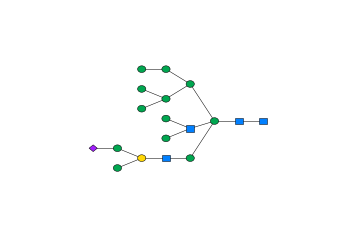

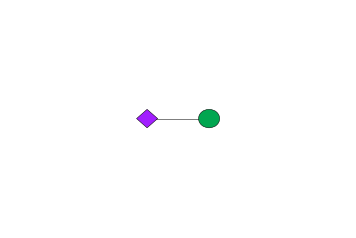

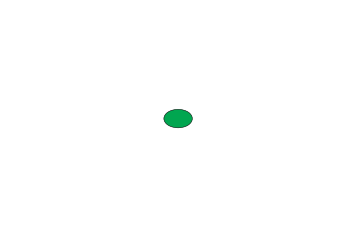

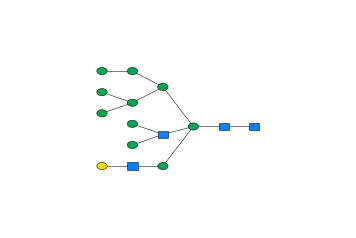

In [184]:
analyze_match(0, plottable_matches_w_contexts)

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(
Match:
	Ma3)Ab
Right context:
	4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


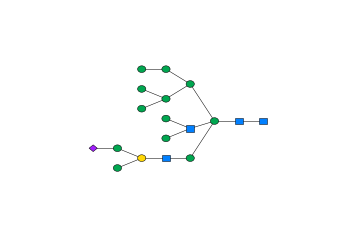

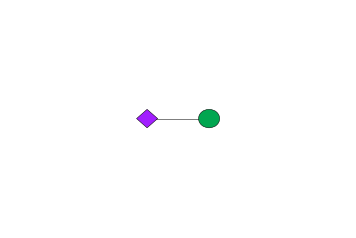

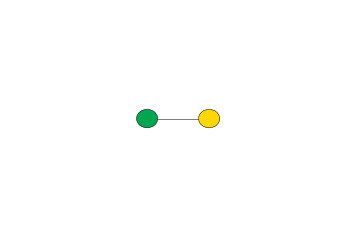

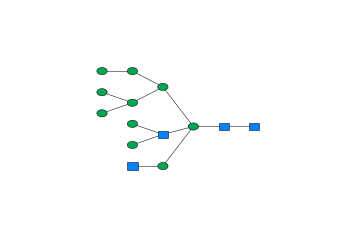

In [185]:
analyze_match(1, plottable_matches_w_contexts)

In [187]:
plottable_matches_w_contexts[1]
plottable_matches_w_contexts[2]

('NNa6Ma6(',
 'Ma3)Ab',
 '4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(',
 'Ma3)Ab4',
 'GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

In [188]:
# analyze_match(2, plottable_matches_w_contexts)

In [189]:
plottable_matches_w_contexts[3]

('NNa6Ma6(',
 'Ma3)Ab4GNb',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(
Match:
	Ma3)Ab4GNb
Right context:
	2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


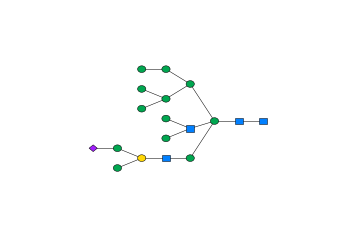

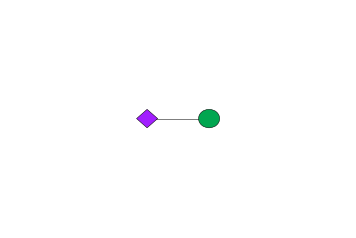

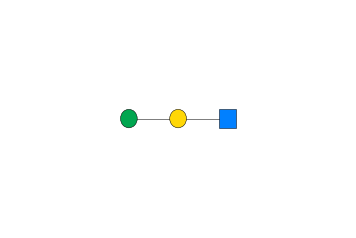

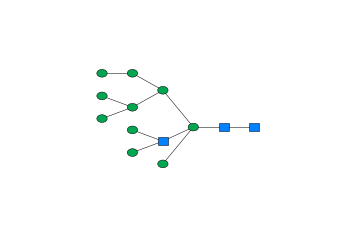

In [190]:
analyze_match(3, plottable_matches_w_contexts)

In [195]:
plottable_matches_w_contexts[3]
plottable_matches_w_contexts[4]
# analyze_match(4, plottable_matches_w_contexts)

('NNa6Ma6(',
 'Ma3)Ab4GNb',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(',
 'Ma3)Ab4GNb2',
 'Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

In [196]:
plottable_matches_w_contexts[5]

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(
Match:
	Ma3)Ab4GNb2Ma
Right context:
	3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


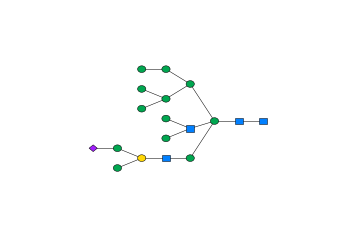

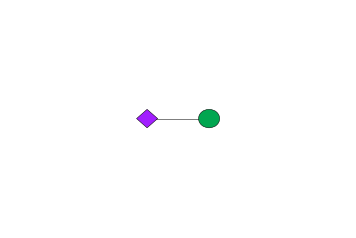

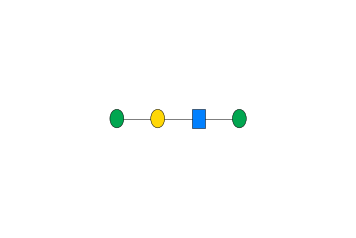

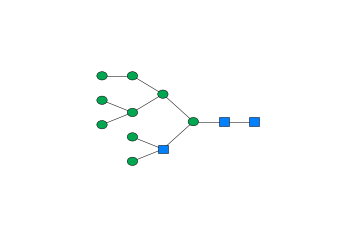

In [197]:
analyze_match(5, plottable_matches_w_contexts)

In [201]:
plottable_matches_w_contexts[5]
plottable_matches_w_contexts[6]
# analyze_match(6, plottable_matches_w_contexts)

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3',
 '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(
Match:
	Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb
Right context:
	4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


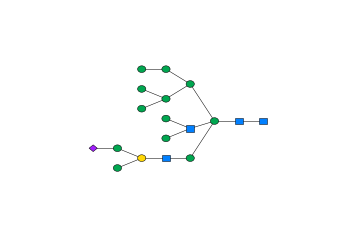

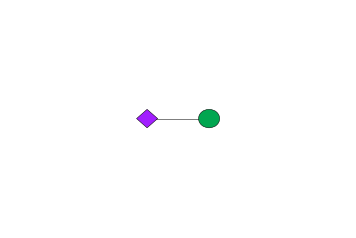

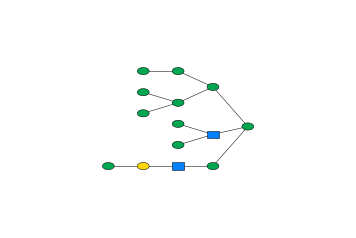

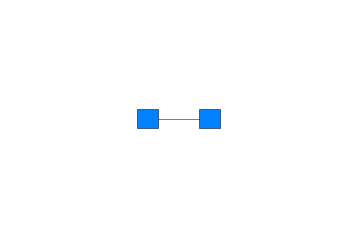

In [200]:
plottable_matches_w_contexts[7]
analyze_match(7, plottable_matches_w_contexts)

In [202]:
plottable_matches_w_contexts[7]
plottable_matches_w_contexts[8]
# analyze_match(8, plottable_matches_w_contexts)

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb4GN')

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 'GNb4GN')

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(
Match:
	Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb
Right context:
	4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


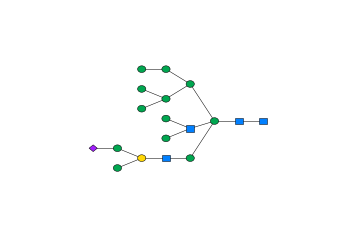

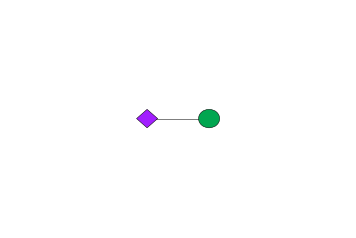

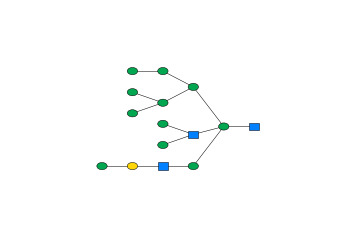

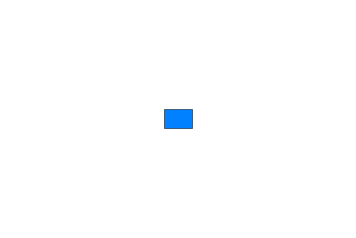

In [203]:
plottable_matches_w_contexts[9]
analyze_match(9, plottable_matches_w_contexts)

In [204]:
plottable_matches_w_contexts[9]
plottable_matches_w_contexts[10]
# analyze_match(10, plottable_matches_w_contexts)

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '4GN')

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'GN')

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(
Match:
	Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Right context:
	
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


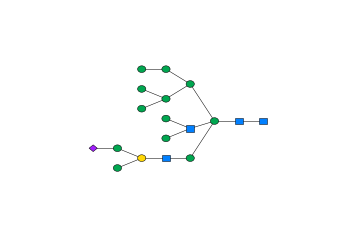

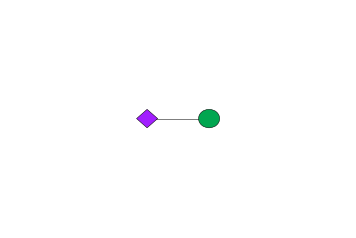

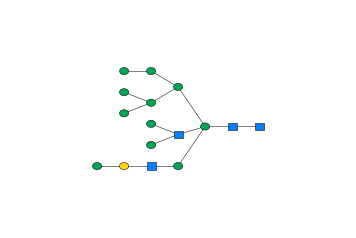

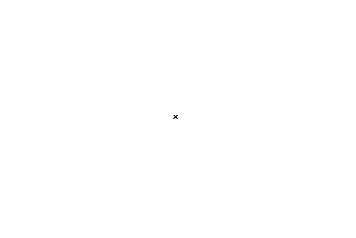

In [205]:
plottable_matches_w_contexts[11]
analyze_match(11, plottable_matches_w_contexts)

In [206]:
plottable_matches_w_contexts[11]
plottable_matches_w_contexts[12]

('NNa6Ma6(',
 'Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '')

('NNa6Ma6(Ma3',
 ')',
 'Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')',
 'Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(Ma3
Match:
	)
Right context:
	Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


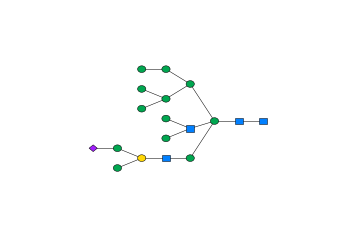

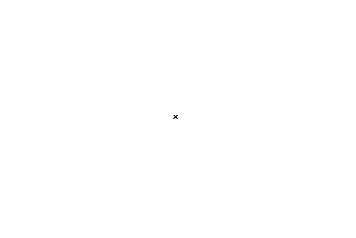

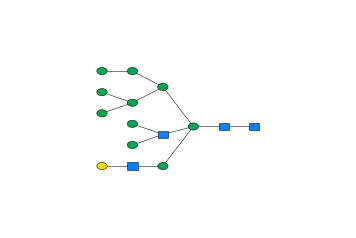

In [207]:
#this is dumb
plottable_matches_w_contexts[12]
analyze_match(12, plottable_matches_w_contexts)

In [208]:
plottable_matches_w_contexts[12]
plottable_matches_w_contexts[13]

('NNa6Ma6(Ma3',
 ')',
 'Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab',
 '4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab',
 '4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(Ma3
Match:
	)Ab
Right context:
	4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


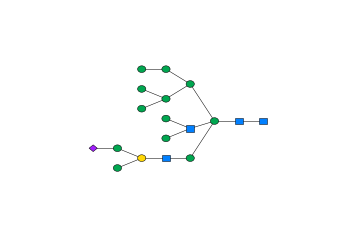

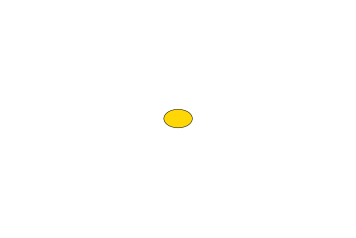

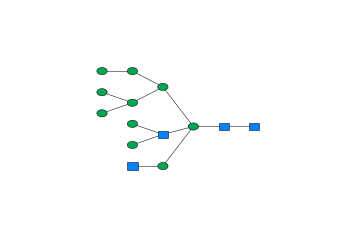

In [209]:
#this is INTERESTING 
# - the match is a node s.t. 
# - the left context describes a set of subtrees whose roots are all children
#   of the match's lowest 
plottable_matches_w_contexts[13]
analyze_match(13, plottable_matches_w_contexts)

In [210]:
plottable_matches_w_contexts[13]
plottable_matches_w_contexts[14]

('NNa6Ma6(Ma3',
 ')Ab',
 '4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4',
 'GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(Ma3
Match:
	)Ab4GNb
Right context:
	2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


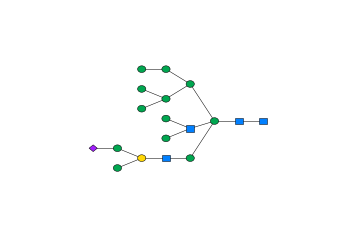

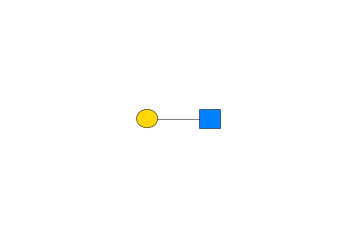

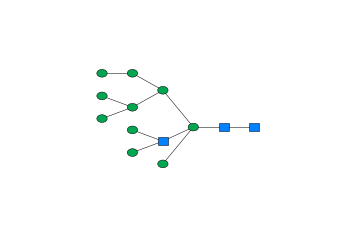

In [211]:
plottable_matches_w_contexts[15]
analyze_match(15, plottable_matches_w_contexts)

In [214]:
plottable_matches_w_contexts[15]
plottable_matches_w_contexts[16]
plottable_matches_w_contexts[17]
plottable_matches_w_contexts[18]
plottable_matches_w_contexts[19]

('NNa6Ma6(Ma3',
 ')Ab4GNb',
 '2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2',
 'Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma',
 '3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3',
 '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3',
 '(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(Ma3
Match:
	)Ab4GNb2Ma3
Right context:
	(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


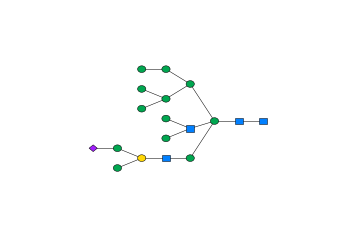

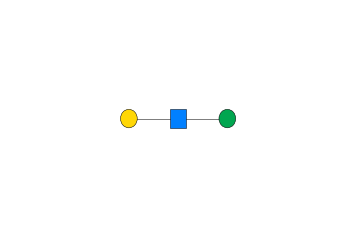

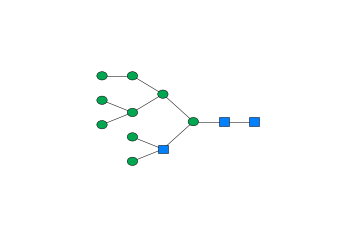

In [215]:
plottable_matches_w_contexts[18]
analyze_match(18, plottable_matches_w_contexts)

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(Ma3
Match:
	)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb
Right context:
	4GNb4GN
Showing whole tree...
Left context not plottable.
Showing match plot...
Showing right context plot...


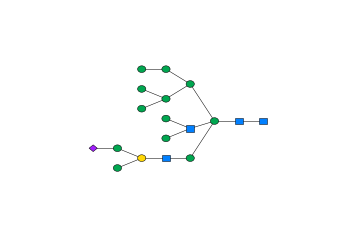

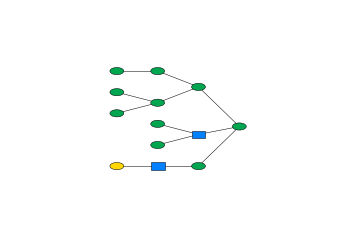

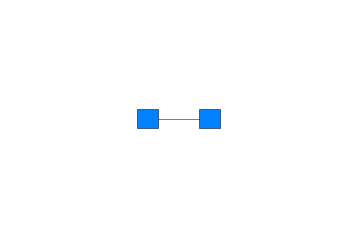

In [216]:
plottable_matches_w_contexts[19]
analyze_match(19, plottable_matches_w_contexts)

In [221]:
plottable_matches_w_contexts[19]
plottable_matches_w_contexts[20]
plottable_matches_w_contexts[21]
plottable_matches_w_contexts[22]
plottable_matches_w_contexts[23]
plottable_matches_w_contexts[24]

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 'GNb4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '4GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'GN')

('NNa6Ma6(Ma3',
 ')Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '')

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)',
 '(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)',
 '(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(
Match:
	Mb4(Ma3)GNb4)
Right context:
	(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


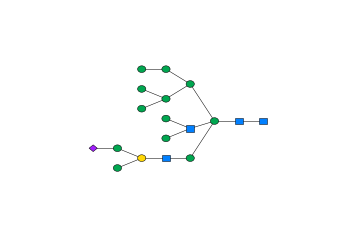

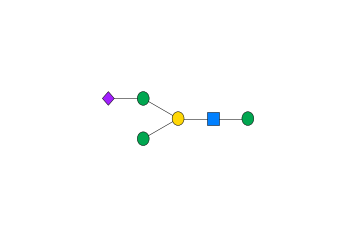

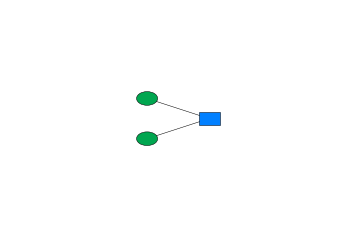

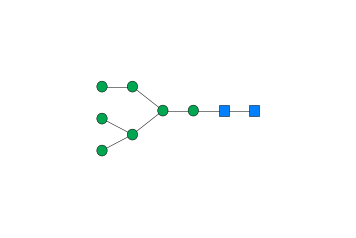

In [222]:
plottable_matches_w_contexts[24]
analyze_match(24, plottable_matches_w_contexts)

In [224]:
plottable_matches_w_contexts[24]
plottable_matches_w_contexts[25]

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)',
 '(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN')

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb4GN')

Whole tree:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN
Left context:
	NNa6Ma6(Ma3)Ab4GNb2Ma3(
Match:
	Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb
Right context:
	4GNb4GN
Showing whole tree...
Showing left context plot...
Showing match plot...
Showing right context plot...


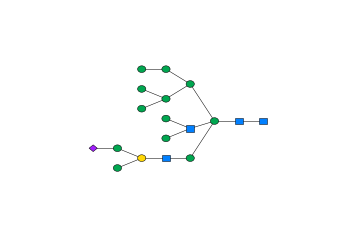

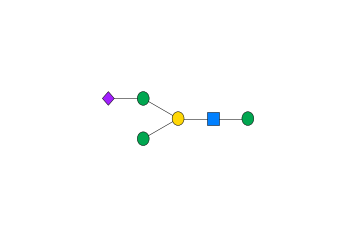

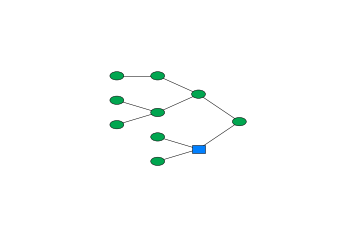

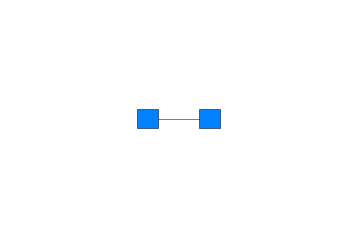

In [225]:
analyze_match(25, plottable_matches_w_contexts)

In [226]:
plottable_matches_w_contexts[25]
plottable_matches_w_contexts[26]
plottable_matches_w_contexts[27]
plottable_matches_w_contexts[28]
plottable_matches_w_contexts[29]

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb',
 '4GNb4GN')

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4',
 'GNb4GN')

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb',
 '4GN')

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4',
 'GN')

('NNa6Ma6(Ma3)Ab4GNb2Ma3(',
 'Mb4(Ma3)GNb4)(Ma6(Ma3)Ma3(Ma3Ma6)Ma6)Mb4GNb4GN',
 '')